# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Morandi, Simone Domenico (336974);

Now, fill the python list below with the Student IDs of the team

In [22]:
StudentIDs = [336974]

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [23]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
History
Politics
PC
Biology
Chemistry
Geography
Foreign languages
Law
Cars
Religion
Dancing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Pets
Horror
Thriller
Comedy
Fantasy/Fairy tales
Animated
Western
Action
Music
Slow songs or fast songs
Folk
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Latino
Techno, Trance
Daily events
Writing notes
Workaholism
Friends versus money
Fake
Criminal damage
Decision making
Elections
Judgment calls
Hypochondria
Empathy
Eating to survive
Compassion to animals
Borrowed stuff
Cheating in school
Health
Changing the past
Charity
Punctuality
Waiting
New environment
Mood swings
Appearence and gestures
Achievements
Responding to a serious letter
Assertiveness
Getting ang

Finances  Entertainment spending  Spending on looks  Spending on gadgets  \
183         3                       3                  3                    1   
407         2                       5                  4                    2   
565         4                       5                  5                    5   
545         1                       1                  1                    1   
153         3                       2                  4                    3   
..        ...                     ...                ...                  ...   
195         4                       2                  1                    1   
630         5                       5                  4                    4   
385         1                       4                  4                    2   
232         4                       3                  4                    4   
635         3                       3                  4                    2   

     Spending on healthy eating         Smoking         Alcohol  History  \
183                           3  current smoker  social drinker        2   
407                           1   former smoker     drink a lot        4   
565                           5  current smoker  social drinker        3   
545                           1   tried smoking  social drinker        1   
153                           4   tried smoking  social drinker        4   
..                          ...             ...             ...      ...   
195                           4   former smoker  social drinker        3   
630                           4   tried smoking  social drinker        1   
385                           4   tried smoking  social drinker        3   
232                           4   tried smoking  social drinker        5   
635                           3    never smoked  social drinker        4   

     Politics  PC  ...  Age  Height  Weight  Number of siblings  Gender  \
183         3   3  ...   23     171      59                   2  female   
407         1   2  ...   17     165      65                   3  female   
565         5   3  ...   19     193      77                   1    male   
545         3   2  ...   21     173      62                   1  female   
153         3   3  ...   18     173      55                   3  female   
..        ...  ..  ...  ...     ...     ...                 ...     ...   
195         2   1  ...   19     170      55                   1  female   
630         2   5  ...   20     155      45                   1  female   
385         4   2  ...   17     163      49                   3  female   
232         3   3  ...   19     185      62                   1    male   
635         3   1  ...   19     162      47                   1  female   

      Hand         Education  Only child  Home Town Type       Home Type  
183  right  secondary school          no         village  house/bungalow  
407  right    primary school          no            city  block of flats  
565  right  secondary school         yes            city  block of flats  
545  right  secondary school          no         village  house/bungalow  
153  right    primary school          no            city  block of flats  
..     ...               ...         ...             ...             ...  
195  right  secondary school          no            city  block of flats  
630  right  secondary school          no            city  block of flats  
385   left    primary school         yes         village  house/bungalow  
232  right  secondary school          no         village  house/bungalow  
635  right  secondary school          no         village  house/bungalow  

[506 rows x 103 columns]


*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


Finances  Entertainment spending  Spending on looks  Spending on gadgets  \
183         3                       3                  3                    1   
407         2                       5                  4                    2   
565         4                       5                  5                    5   
545         1                       1                  1                    1   
153         3                       2                  4                    3   
..        ...                     ...                ...                  ...   
195         4                       2                  1                    1   
630         5                       5                  4                    4   
385         1                       4                  4                    2   
232         4                       3                  4                    4   
635         3                       3                  4                    2   

     Spending on healthy eating         Smoking         Alcohol  History  \
183                           3  current smoker  social drinker        2   
407                           1   former smoker     drink a lot        4   
565                           5  current smoker  social drinker        3   
545                           1   tried smoking  social drinker        1   
153                           4   tried smoking  social drinker        4   
..                          ...             ...             ...      ...   
195                           4   former smoker  social drinker        3   
630                           4   tried smoking  social drinker        1   
385                           4   tried smoking  social drinker        3   
232                           4   tried smoking  social drinker        5   
635                           3    never smoked  social drinker        4   

     Politics  PC  ...  Finding lost valuables  Interests or hobbies  \
183         3   3  ...                       3                     5   
407         1   2  ...                       2                     4   
565         5   3  ...                       1                     3   
545         3   2  ...                       4                     3   
153         3   3  ...                       4                     3   
..        ...  ..  ...                     ...                   ...   
195         2   1  ...                       3                     1   
630         2   5  ...                       3                     5   
385         4   2  ...                       1                     3   
232         3   3  ...                       2                     4   
635         3   1  ...                       1                     4   

     Parents' advice           Internet usage  Flying  Storm  Darkness  \
183                3          few hours a day       1      1         1   
407                2          few hours a day       2      3         3   
565                3          few hours a day       1      1         3   
545                4          most of the day       1      1         1   
153                3  less than an hour a day       3      2         2   
..               ...                      ...     ...    ...       ...   
195                3  less than an hour a day       1      1         3   
630                4          few hours a day       4      5         5   
385                3          few hours a day       1      1         4   
232                4  less than an hour a day       1      1         2   
635                4          few hours a day       1      1         2   

     Heights  Spiders  Snakes  
183        2        5       4  
407        1        3       3  
565        2        2       5  
545        5        5       5  
153        3        5       4  
..       ...      ...     ...  
195        2        2       1  
630        5        5       2  
385        3        5       4  
232        2        2       1  
635        2 


*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


Age  Height  Weight  Number of siblings  Gender   Hand         Education  \
183   23     171      59                   2  female  right  secondary school   
407   17     165      65                   3  female  right    primary school   
565   19     193      77                   1    male  right  secondary school   
545   21     173      62                   1  female  right  secondary school   
153   18     173      55                   3  female  right    primary school   
..   ...     ...     ...                 ...     ...    ...               ...   
195   19     170      55                   1  female  right  secondary school   
630   20     155      45                   1  female  right  secondary school   
385   17     163      49                   3  female   left    primary school   
232   19     185      62                   1    male  right  secondary school   
635   19     162      47                   1  female  right  secondary school   

    Only child Home Town Type       Home Type  
183         no        village  house/bungalow  
407         no           city  block of flats  
565        yes           city  block of flats  
545         no        village  house/bungalow  
153         no           city  block of flats  
..         ...            ...             ...  
195         no           city  block of flats  
630         no           city  block of flats  
385        yes        village  house/bungalow  
232         no        village  house/bungalow  
635         no        village  house/bungalow  

[506 rows x 10 columns]

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.patches import Patch
#%matplotlib widget

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [25]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE MinMaxScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
In our dataset there are only four categorical features. All of them can be seen as totally ordered features. In particular, "Smoking" and "Alcohol" have values relative to the frequency of the consumption of cigarettes/alcohol. So we encode these features starting from setting "never smoked" and "never (drank)" to zero, then augmenting the value as the frequency increases. For "Punctuality", if we see the best arrival time as "on time", we can start from encoding this value to zero and augmenting the value as the delay increases. Lastly, "Internet usage" tells us how many hours one spends on the internet, so the encoding is straight forward starting from the least usage of internet being set to zero. It is important to notice that this encoding provides more explained variance in the first 5 components than one-hot encoding, which would also augment the dimensionality of the problem.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
As requested, we apply the MinMax scaler to our encoded dataset. This is probably the best choice since all numerical features and also the encoded categorical ones have a range of value that goes from 0 to 3. Thus, there isn't a significant disparity in data magnitude, for which a standard scaler would have been better.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [26]:
# Listing categorical features and their values.
categorical_features = responses_ft.select_dtypes(include=['object', 'category'])
list(categorical_features.columns)
for col in categorical_features:
    print(f"\n{col}: {sorted(responses_ft[col].dropna().unique())}")


Smoking: ['current smoker', 'former smoker', 'never smoked', 'tried smoking']

Alcohol: ['drink a lot', 'never', 'social drinker']

Punctuality: ['early', 'late', 'on time']

Internet usage: ['few hours a day', 'less than an hour a day', 'most of the day']


In [27]:
# Totally ordered encoding.

# Creating encoding maps.
smoking_map = {
    'current smoker':3,
    'former smoker':2, 
    'never smoked':0, 
    'tried smoking':1
}

alcohol_map = {
    'drink a lot':2,
    'never': 0, 
    'social drinker':1
}

punctuality_map = {
    'late': 2,
    'on time': 1,
    'early': 0
}

internet_map = {
    'less than an hour a day': 0,
    'few hours a day': 1,
    'most of the day': 2
}

# Creating new encoded dataset.
responses_ft_enc = responses_ft.copy()
responses_ft_enc['Smoking'] = responses_ft_enc['Smoking'].map(smoking_map)
responses_ft_enc['Alcohol'] = responses_ft_enc['Alcohol'].map(alcohol_map)
responses_ft_enc['Punctuality'] = responses_ft_enc['Punctuality'].map(punctuality_map)
responses_ft_enc['Internet usage'] = responses_ft_enc['Internet usage'].map(internet_map)

# Printing results.

# Whole dataset.
print("Whole encoded dataset:")
display(responses_ft_enc)

# Encoded features.

# Values.
print("Encoded features' values: \n")
for col in categorical_features:
    print(f"{col}: {sorted(responses_ft_enc[col].dropna().unique().tolist())}")
# Columns.
print("\n")
print("Encoded features' columns:")
display(responses_ft_enc[categorical_features.columns])

Whole encoded dataset:


Finances  Entertainment spending  Spending on looks  Spending on gadgets  \
183         3                       3                  3                    1   
407         2                       5                  4                    2   
565         4                       5                  5                    5   
545         1                       1                  1                    1   
153         3                       2                  4                    3   
..        ...                     ...                ...                  ...   
195         4                       2                  1                    1   
630         5                       5                  4                    4   
385         1                       4                  4                    2   
232         4                       3                  4                    4   
635         3                       3                  4                    2   

     Spending on healthy eating  Smoking  Alcohol  History  Politics  PC  ...  \
183                           3        3        1        2         3   3  ...   
407                           1        2        2        4         1   2  ...   
565                           5        3        1        3         5   3  ...   
545                           1        1        1        1         3   2  ...   
153                           4        1        1        4         3   3  ...   
..                          ...      ...      ...      ...       ...  ..  ...   
195                           4        2        1        3         2   1  ...   
630                           4        1        1        1         2   5  ...   
385                           4        1        1        3         4   2  ...   
232                           4        1        1        5         3   3  ...   
635                           3        0        1        4         3   1  ...   

     Finding lost valuables  Interests or hobbies  Parents' advice  \
183                       3                     5                3   
407                       2                     4                2   
565                       1                     3                3   
545                       4                     3                4   
153                       4                     3                3   
..                      ...                   ...              ...   
195                       3                     1                3   
630                       3                     5                4   
385                       1                     3                3   
232                       2                     4                4   
635                       1                     4                4   

     Internet usage  Flying  Storm  Darkness  Heights  Spiders  Snakes  
183               1       1      1         1        2        5       4  
407               1       2      3         3        1        3       3  
565               1       1      1         3        2        2       5  
545               2       1      1         1        5        5       5  
153               0       3      2         2        3        5       4  
..              ...     ...    ...       ...      ...      ...     ...  
195               0       1      1         3        2        2       1  
630               1       4      5         5        5        5       2  
385               1       1      1         4        3        5       4  
232               0       1      1         2        2        2       1  
635               1       1      1         2        2        5       3  

[506 rows x 93 columns]

Encoded features' values: 

Smoking: [0, 1, 2, 3]
Alcohol: [0, 1, 2]
Punctuality: [0, 1, 2]
Internet usage: [0, 1, 2]


Encoded features' columns:


Smoking  Alcohol  Punctuality  Internet usage
183        3        1            0               1
407        2        2            1               1
565        3        1            1               1
545        1        1            2               2
153        1        1            0               0
..       ...      ...          ...             ...
195        2        1            2               0
630        1        1            0               1
385        1        1            1               1
232        1        1            0               0
635        0        1            2               1

[506 rows x 4 columns]

In [28]:
# Preprocessing.

# Applying MinMaxScaler.
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(scaled_array, columns = responses_ft_enc.columns, index=responses_ft_enc.index)

# Printing results.

# Whole dataset.
print("Whole preprocessed dataset:")
display(responses_ft_pp)

# Column of one numerical and two encoded categorical feature.
print("One numerical feature:")
display(responses_ft_pp[['PC']])
print("Two encoded categorical feature:")
display(responses_ft_pp[['Smoking','Punctuality']])

Whole preprocessed dataset:


Finances  Entertainment spending  Spending on looks  Spending on gadgets  \
183      0.50                    0.50               0.50                 0.00   
407      0.25                    1.00               0.75                 0.25   
565      0.75                    1.00               1.00                 1.00   
545      0.00                    0.00               0.00                 0.00   
153      0.50                    0.25               0.75                 0.50   
..        ...                     ...                ...                  ...   
195      0.75                    0.25               0.00                 0.00   
630      1.00                    1.00               0.75                 0.75   
385      0.00                    0.75               0.75                 0.25   
232      0.75                    0.50               0.75                 0.75   
635      0.50                    0.50               0.75                 0.25   

     Spending on healthy eating   Smoking  Alcohol  History  Politics    PC  \
183                        0.50  1.000000      0.5     0.25      0.50  0.50   
407                        0.00  0.666667      1.0     0.75      0.00  0.25   
565                        1.00  1.000000      0.5     0.50      1.00  0.50   
545                        0.00  0.333333      0.5     0.00      0.50  0.25   
153                        0.75  0.333333      0.5     0.75      0.50  0.50   
..                          ...       ...      ...      ...       ...   ...   
195                        0.75  0.666667      0.5     0.50      0.25  0.00   
630                        0.75  0.333333      0.5     0.00      0.25  1.00   
385                        0.75  0.333333      0.5     0.50      0.75  0.25   
232                        0.75  0.333333      0.5     1.00      0.50  0.50   
635                        0.50  0.000000      0.5     0.75      0.50  0.00   

     ...  Finding lost valuables  Interests or hobbies  Parents' advice  \
183  ...                    0.50                  1.00             0.50   
407  ...                    0.25                  0.75             0.25   
565  ...                    0.00                  0.50             0.50   
545  ...                    0.75                  0.50             0.75   
153  ...                    0.75                  0.50             0.50   
..   ...                     ...                   ...              ...   
195  ...                    0.50                  0.00             0.50   
630  ...                    0.50                  1.00             0.75   
385  ...                    0.00                  0.50             0.50   
232  ...                    0.25                  0.75             0.75   
635  ...                    0.00                  0.75             0.75   

     Internet usage  Flying  Storm  Darkness  Heights  Spiders  Snakes  
183             0.5    0.00   0.00      0.00     0.25     1.00    0.75  
407             0.5    0.25   0.50      0.50     0.00     0.50    0.50  
565             0.5    0.00   0.00      0.50     0.25     0.25    1.00  
545             1.0    0.00   0.00      0.00     1.00     1.00    1.00  
153             0.0    0.50   0.25      0.25     0.50     1.00    0.75  
..              ...     ...    ...       ...      ...      ...     ...  
195             0.0    0.00   0.00      0.50     0.25     0.25    0.00  
630             0.5    0.75   1.00      1.00     1.00     1.00    0.25  
385             0.5    0.00   0.00      0.75     0.50     1.00    0.75  
232             0.0    0.00   0.00      0.25     0.25     0.25    0.00  
635             0.5    0.00   0.00      0.25     0.25     1.00    0.50  

[506 rows x 93 columns]

One numerical feature:


PC
183  0.50
407  0.25
565  0.50
545  0.25
153  0.50
..    ...
195  0.00
630  1.00
385  0.25
232  0.50
635  0.00

[506 rows x 1 columns]

Two encoded categorical feature:


Smoking  Punctuality
183  1.000000          0.0
407  0.666667          0.5
565  1.000000          0.5
545  0.333333          1.0
153  0.333333          0.0
..        ...          ...
195  0.666667          1.0
630  0.333333          0.0
385  0.333333          0.5
232  0.333333          0.0
635  0.000000          1.0

[506 rows x 2 columns]

#### Comment the results obtained after the preprocessing operation (max 100 words):
After the preprocessing we can see that all features have been re-scaled to a range from 0 to 1. All numerical values have been rescaled with the following formula:
$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$
where $x$ is the raw data value and $x_{\text{scaled}}$ is the new preprocessed one. Now that all values have been rescaled, PCA can be applied safely.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

Variances of the encoded dataset:


Finances                      1.306367
Entertainment spending        1.363664
Spending on looks             1.461155
Spending on gadgets           1.677924
Spending on healthy eating    1.173263
                                ...   
Storm                         1.307498
Darkness                      1.575314
Heights                       1.716186
Spiders                       2.371072
Snakes                        2.273522
Length: 93, dtype: float64



Variances of the preprocessed dataset:


Finances                      0.081648
Entertainment spending        0.085229
Spending on looks             0.091322
Spending on gadgets           0.104870
Spending on healthy eating    0.073329
                                ...   
Storm                         0.081719
Darkness                      0.098457
Heights                       0.107262
Spiders                       0.148192
Snakes                        0.142095
Length: 93, dtype: float64

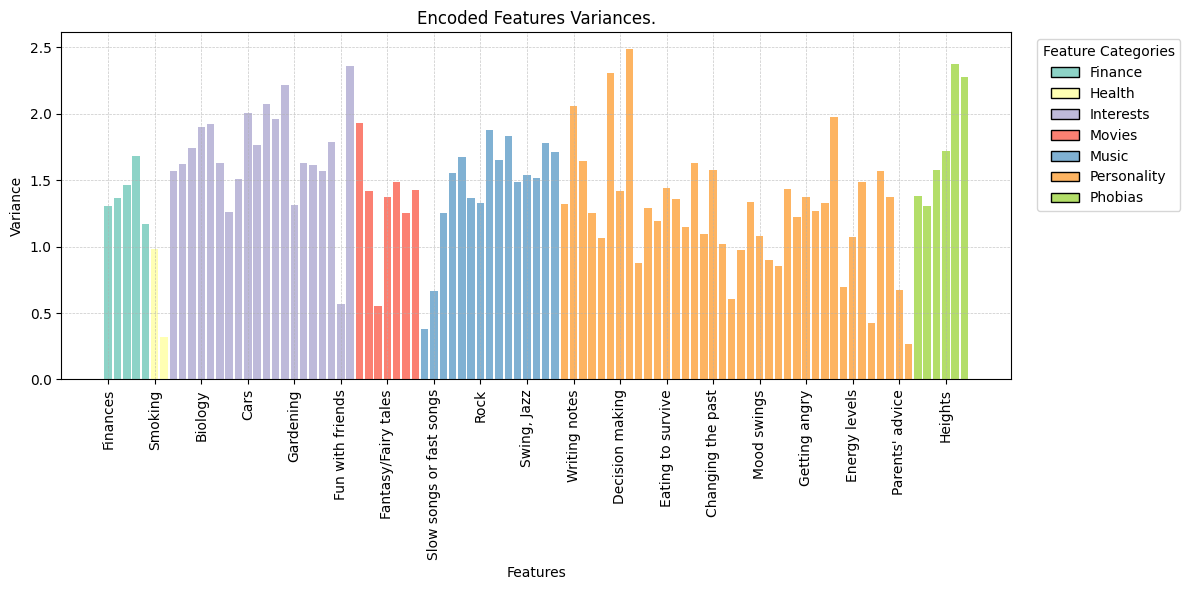

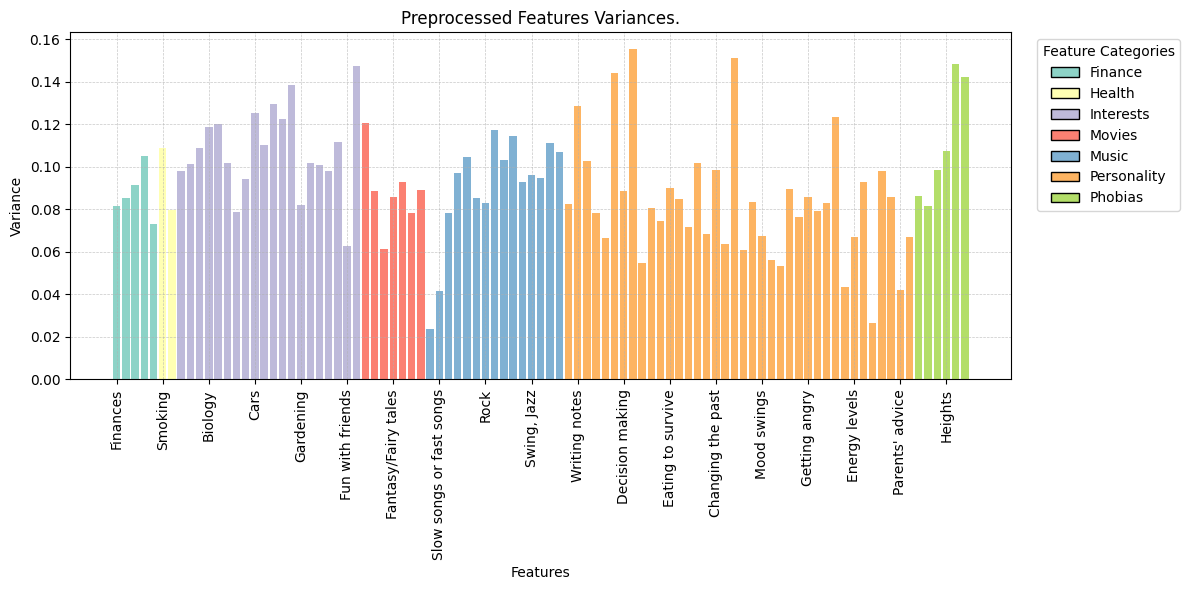

In [29]:
# Extracting data from datasets and computing variances.
X_enc = responses_ft_enc.values
X_pp = responses_ft_pp.values
Xvar_enc = responses_ft_enc.var(axis=0)
Xvar_pp = responses_ft_pp.var(axis=0)
features_names = responses_ft_enc.columns
n = len(features_names)

# Printing variances.
print("Variances of the encoded dataset:")
display(Xvar_enc)
print("\n")
print("Variances of the preprocessed dataset:")
display(Xvar_pp)

# Plotting.

# Creating color map.
set3 = cm.Set3.colors
type_df = pd.read_csv('responses_hw.csv')
type_colors = {
    'Finance': set3[0],
    'Health' : set3[1],
    'Interests' : set3[2],
    'Movies' : set3[3],
    'Music' : set3[4],
    'Personality' : set3[5],
    'Phobias' : set3[6]
}

# Assigning colors.
feature_to_type = {}
for cat, feats in features_by_type.items():
    for f in feats:
        feature_to_type[f] = cat
colors_type = [type_colors.get(feature_to_type.get(f, 'Music'), set3[7]) for f in features_names]
type_legendelements = [Patch(facecolor=type_colors[key], edgecolor='black',label=key) for key in type_colors.keys()]

# Encoded features.
plt.figure(figsize=(12,6))
plt.bar(np.arange(n),Xvar_enc.values,color=colors_type)
plt.title("Encoded Features Variances.")
plt.xticks(ticks=np.arange(0,n,5),rotation=90, labels=features_names[::5])
plt.xlabel('Features')
plt.ylabel('Variance')
plt.legend(handles=type_legendelements,title="Feature Categories",bbox_to_anchor=(1.02, 1),loc="upper left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha =0.7)
plt.tight_layout()

# Preprocessed features.
plt.figure(figsize=(12,6))
plt.bar(np.arange(n),Xvar_pp.values,color=colors_type)
plt.title("Preprocessed Features Variances.")
plt.xticks(ticks=np.arange(0,n,5),rotation=90,labels=features_names[::5])
plt.xlabel('Features')
plt.ylabel('Variance')
plt.legend(handles=type_legendelements,title="Feature Categories",bbox_to_anchor=(1.02, 1),loc="upper left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha =0.7)
plt.tight_layout()

#### Comment the results obtained for the variances (max 150 words):
As we can see from numerical and graphical results, the variances of the features change a lot from the raw dataset to the preprocessed one. Apart from having a very different ranges of values, we can notice that for the raw data some Phobias and Personality aspect as well as most of the Interests have a great variance. For the preprocessed data, we can see that the maximum range of the variance is decreased and some features have a greater variance (for example the Health category). Even though there are some features that outnumber the others, in the preprocessed data we see that the total variance is slightly better distributed among all features, as one would expect from applying a scaler to a dataset.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

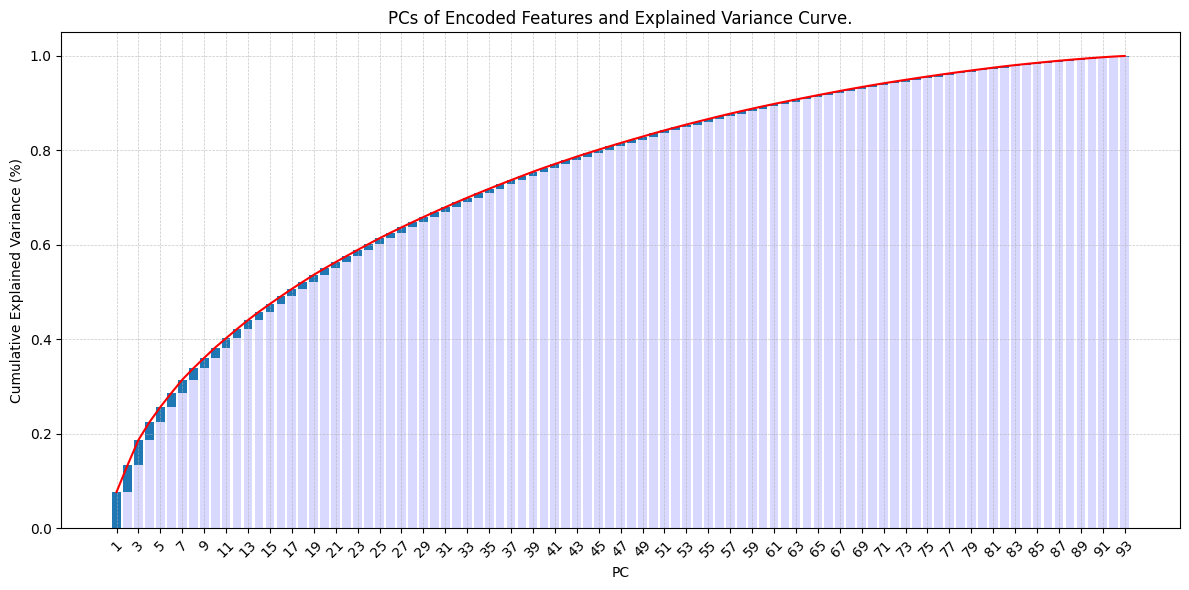

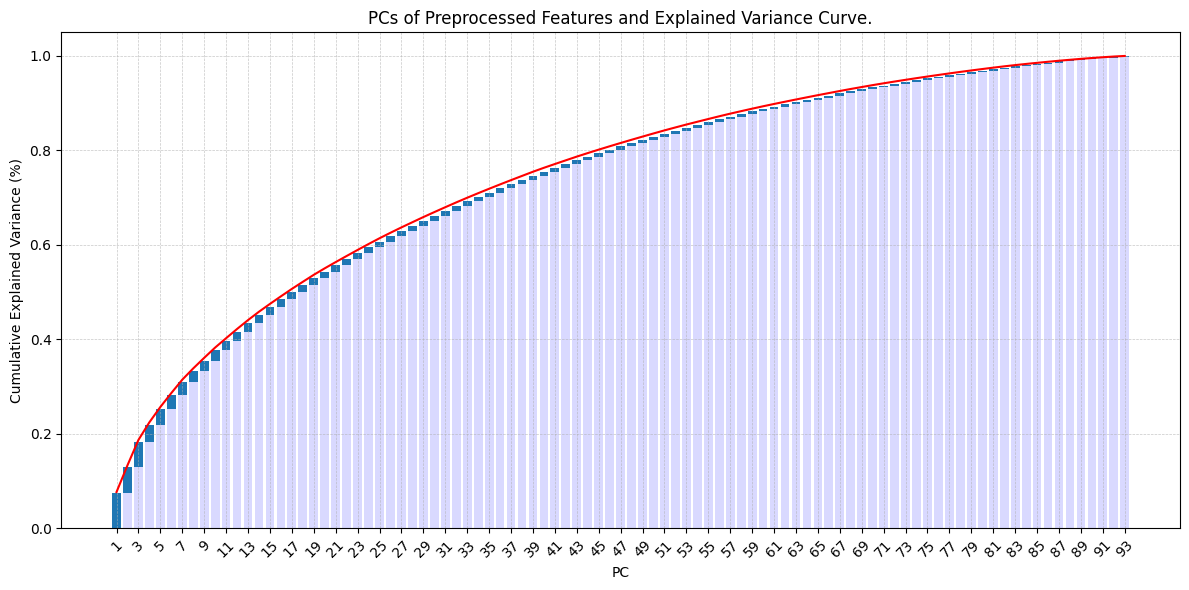

In [30]:
# Applying PCA.

# Encoded dataset.
pca_enc_full = PCA()
pca_enc_full.fit(X_enc)

# Preprocessed dataset.
pca_pp_full = PCA()
pca_pp_full.fit(X_pp) 

# Plotting.

# Encoded dataset.
plt.figure(figsize=(12,6))
plt.bar(np.arange(pca_enc_full.n_features_in_),pca_enc_full.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_enc_full.explained_variance_ratio_),0,0)[:-1])
plt.bar(np.arange(pca_enc_full.n_features_in_),np.insert(np.cumsum(pca_enc_full.explained_variance_ratio_),0,0)[:-1],color='b',alpha=0.15)
plt.plot(np.cumsum(pca_enc_full.explained_variance_ratio_),'r')
plt.title('PCs of Encoded Features and Explained Variance Curve.')
ticks_enc = np.arange(0, pca_enc_full.n_features_in_, 2)
plt.xticks(ticks=ticks_enc,rotation=45,labels=[f"{i+1}" for i in ticks_enc])
plt.xlabel('PC')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True,linestyle='--', linewidth=0.5,alpha=0.7)
plt.tight_layout()
plt.show()

# Preprocessed dataset.
plt.figure(figsize=(12,6))
plt.bar(np.arange(pca_pp_full.n_features_in_),pca_pp_full.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_pp_full.explained_variance_ratio_),0,0)[:-1])
plt.bar(np.arange(pca_pp_full.n_features_in_),np.insert(np.cumsum(pca_pp_full.explained_variance_ratio_),0,0)[:-1],color='b',alpha=0.15)
plt.plot(np.cumsum(pca_enc_full.explained_variance_ratio_),'r')
plt.title('PCs of Preprocessed Features and Explained Variance Curve.')
ticks_pp = np.arange(0, pca_pp_full.n_features_in_, 2)
plt.xticks(ticks=ticks_enc,rotation=45,labels=[f"{i+1}" for i in ticks_pp])
plt.xlabel('PC')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True,linestyle='--', linewidth=0.5,alpha=0.7)
plt.tight_layout()
plt.show()

#### Comment the results obtained for the cumulative explained variances, knowing the values in the datasets and the features' variances (max 150 words):
For both dataset we can see that the explained variance gradually decreases, especially after the 10-th PC (approximately). In the raw dataset the latest PCs have more explained variance than the preprocessed one. That is positive, considering that we are going to reduce the dimensionality of the problem and looking at just few PCs. Though, for the first PCs, the explained variance is approximately the same for both dataset. That happened probably because from the beginning, there was not a great size disparity in between data to produce remarkable benefits in applying a scaler.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

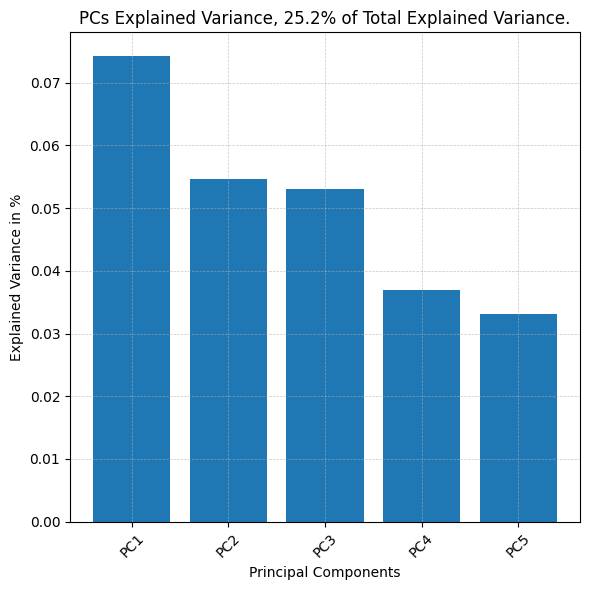

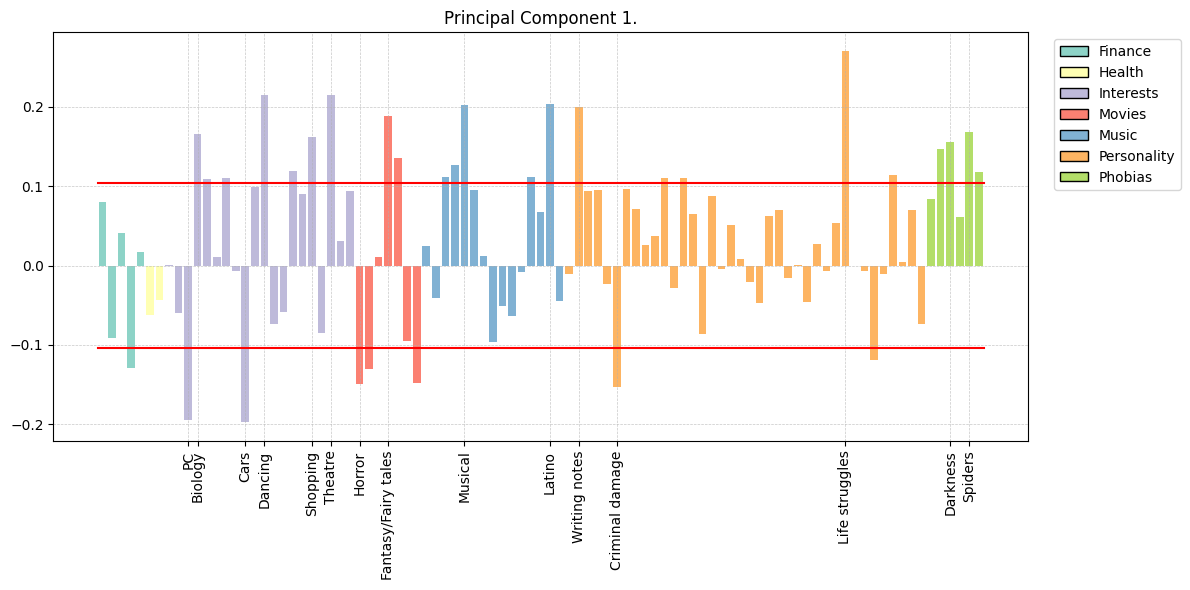

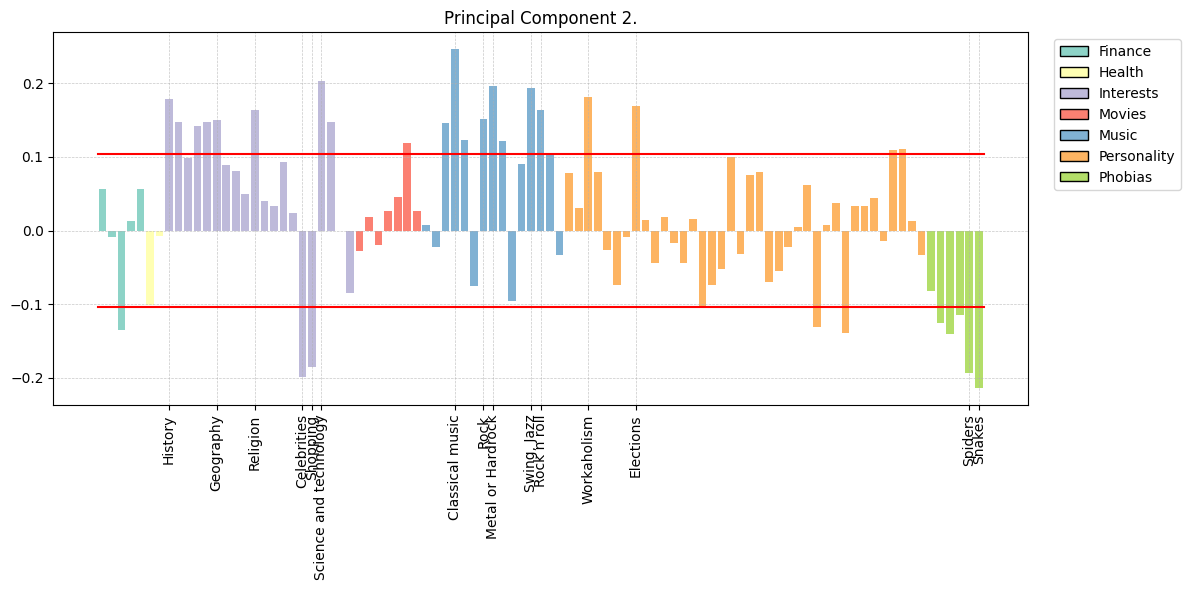

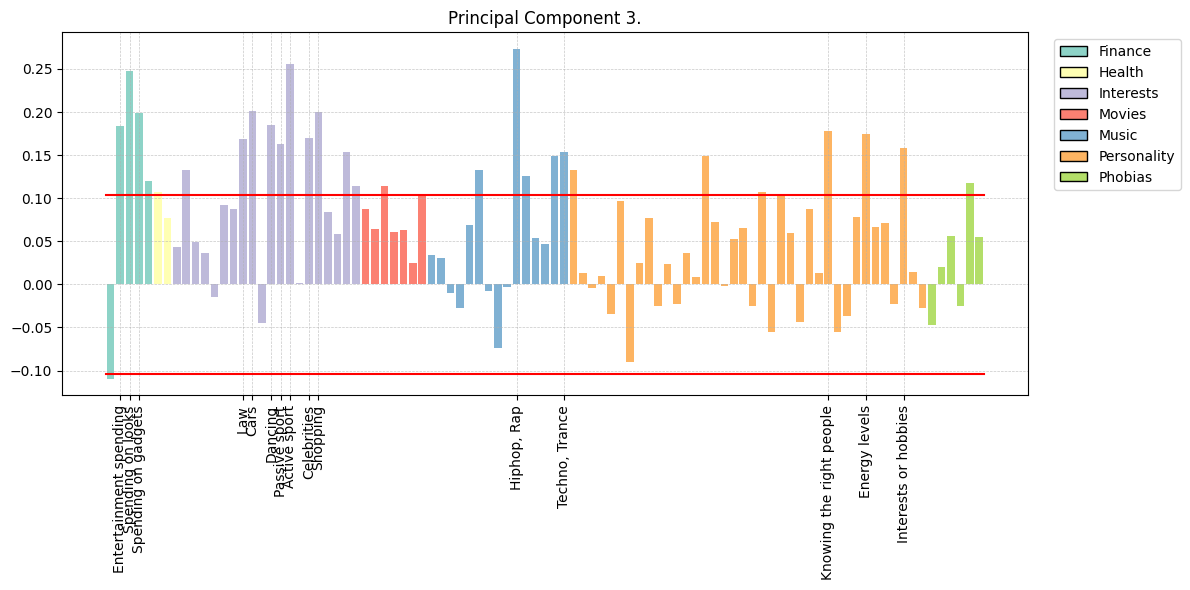

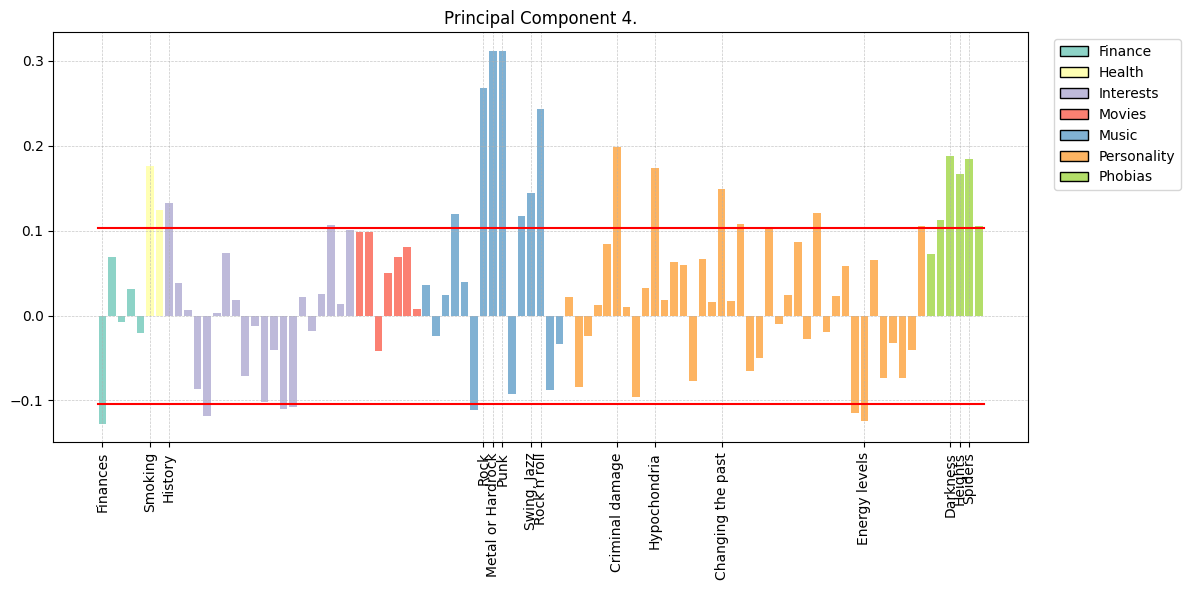

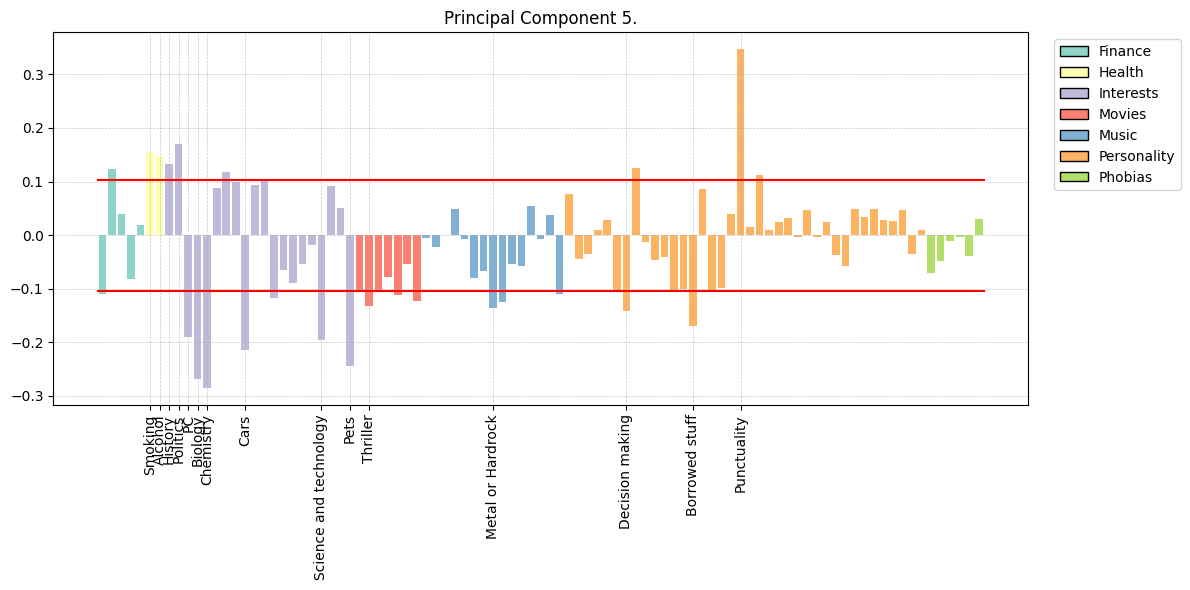

In [31]:
# Retrieving m.
cum_var = np.cumsum(pca_pp_full.explained_variance_ratio_)
m_first = np.argmax(cum_var >= 0.33) + 1
m = min(m_first,5)
# Applying PCA.
pca_pp = PCA(n_components = m)
pca_pp.fit(X_pp) 

# Plotting.

# Computing total explained variance.
round_expl_var_ratio = np.round(pca_pp.explained_variance_ratio_.sum()*100,decimals=2)
# Defining tolerance.
eps = np.sqrt(1/pca_pp.n_features_in_)
plt.figure(figsize=(6,6))
plt.bar(range(1,m+1), pca_pp.explained_variance_ratio_)
plt.title(f'PCs Explained Variance, {round_expl_var_ratio}% of Total Explained Variance.')
plt.xticks(ticks=np.arange(1,m+1),labels=[f'PC{i}' for i in range(1,m+1)], rotation = 45)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance in %')
plt.grid(True, linestyle='--', linewidth=0.5, alpha = 0.7)
plt.tight_layout()
plt.show()


# Plotting each feature and showing the name of the most relevant ones.
top_k = 15
# Generalizing the plot commands.
for i in range(m):
    # Barplot for skill types.
    plt.figure(figsize=(12,6))
    plt.bar(np.arange(pca_pp.n_features_in_),pca_pp.components_[i,:],color=colors_type)
    # Tolerance.
    plt.plot([-0.5,pca_pp.n_features_in_ -0.5],[eps,eps], 'red')
    plt.plot([-0.5,pca_pp.n_features_in_ -0.5],[-eps,-eps], 'red')
    # Showing labels of greatest features.
    top_idx = np.argsort(np.abs(pca_pp.components_[i,:]))[-top_k:]
    top_idx = np.sort(top_idx)
    plt.xticks(ticks=top_idx,labels=[features_names[j] for j in top_idx],rotation=90)
    plt.title(f'Principal Component {i+1}.')
    plt.legend(handles=type_legendelements, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True,linestyle='--',linewidth=0.5, alpha = 0.7)
    plt.tight_layout()
    plt.show()


# Printing important features that exceeds eps or -eps.#
# Commented out for visual reasons.

#for i, pc in enumerate(pca_pp.components_):
#    print(f'Principal Component {i+1}:')
#    above_mask = np.abs(pc) > eps
#    below_mask = np.abs(pc) <= eps
#    # Above eps.
#    print(f'Features ABOVE eps ({eps:.3f}):')
#    for name, value in zip(features_names[above_mask], pc[above_mask]):
#        print(f"  {name}: {value:.6f}")
#        
#   # Below eps.
#    print(f'Features BELOW eps ({eps:.3f}):')
#    for name, value in zip(features_names[below_mask], pc[below_mask]):
#        print(f"  {name}: {value:.6f}")


#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

**PC1:** *Practical Interests(−) vs Artistic Sensitivity (+)*

Analysis of the plot leads us to conclude that on the positive side we have features that concern the artistic/emotional field (Life Struggle, Dancing, Theatre), while on the negative side we have features like PC and Cars. Even if there are other relevant features that concern different fields and are equally important, given the explicit meaning of the positive side, this choice of the name highlights a contrast between the two different types of interests.

**PC2:** *Pop Culture (-) vs Academic Culture(+)*

It is obvious that on the positive side there are all the academic interests as well as the "Workaholism" feature, so again we have a clear picture of what this PC highlights and the name we chose reflects that. On the negative side, we have a strong contribution of the Fears category as well as "Celebrities", "Shopping" and "Spending on Looks". So we can identify these features as related to the "Pop Culture". Again, the overall name tries to highlight contrasts so we can consider the fear of spiders and snakes as common, so part of a popular culture.

**PC3:** *Reserved (-) vs Social (+)*

Here we have a massive positive contribution for the Pop Music feature and the Active Sport one, as well as many things related to a more social lifestyle (Energy Level, Hobbies). On the negative side, only one feature exceeds the tolerance (Finances), so we must take a look to the other ones and also to those that are positive but close to zero. Here we find features related to a low emotional instability and to a reserved lifestyle (Mood Swings, Unpopularity), that is why we chose this name for the negative side of this PC.

**PC4:** *Mainstream(-) vs Alternative(+)*

In this PC the reading is pretty straight forward. On the positive side that are somehow unpopular interests like "Metal", "Rock", "Rock 'n' Roll" as well as smoking habits and criminal damage. On the other side, we have, overall, features related to a more 'tranquil' lifestyle ("Sport", "Friends","Parents' advice"), that are in contrast to the ones on the positive side.

**PC5:** *STEM(-) vs Civic(+)*

For the last PC, we have a strong negative contribute for STEM subjects, so naming the negative axis is straight forward. On the positive instead, side we have overall a lifestyle that prefers a 'Civic-Lifestyle', like for example "Punctuality", "Politics", "Elections". Since "Punctuality" has a massive contribution we decided to stress this by choosing "Civic" as name and not something strictly related to Politics; the attribute "Civic" refers again to the lifestyle adopted by people who were interviewed.

#### Write the code for visualizing the score graph (with PC names on the axis):

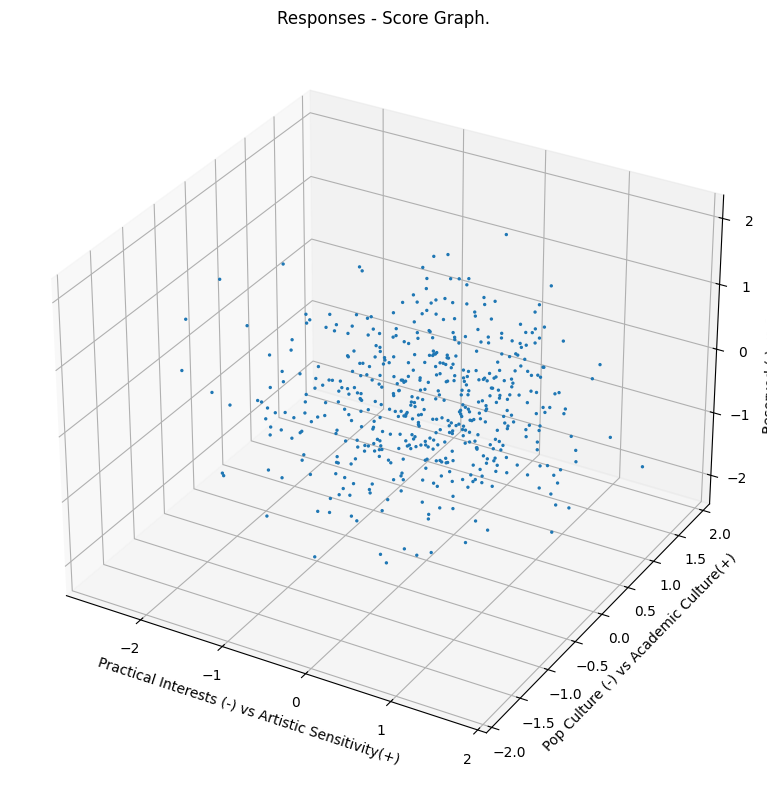

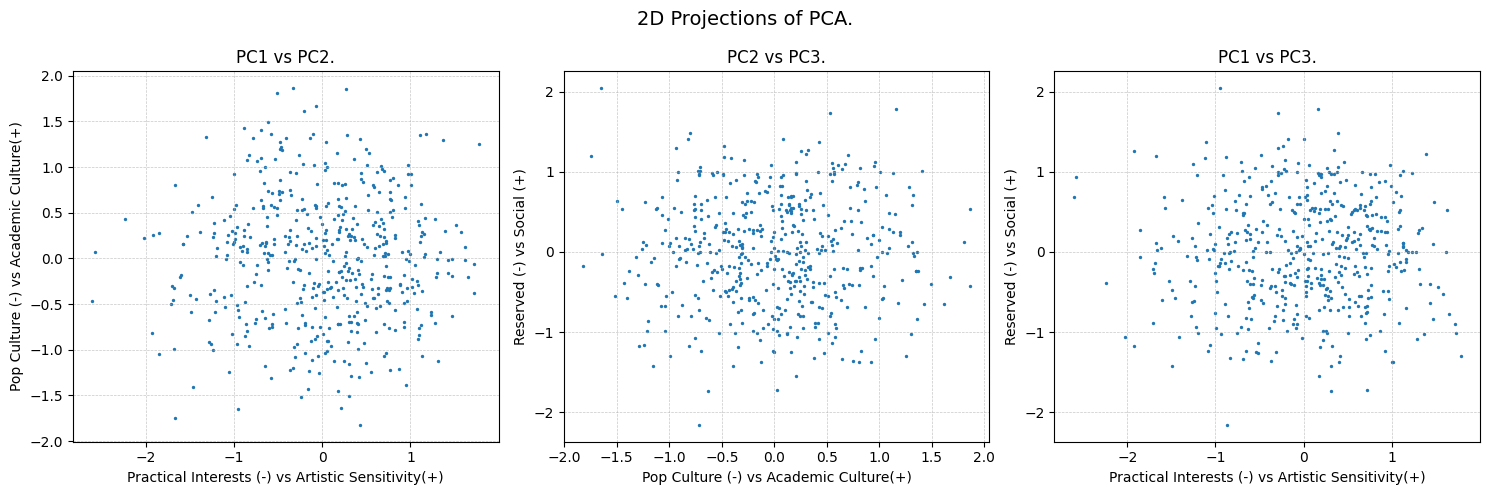

In [32]:
# Naming PCs.
pc_names = ['Practical Interests (-) vs Artistic Sensitivity(+)',
            'Pop Culture (-) vs Academic Culture(+)',
            'Reserved (-) vs Social (+)',
            'Mainstream(-) vs Alternative(+)',
            'STEM(-) vs Civic(+)'
           ]
Y_pp = pca_pp.transform(X_pp)
responses_ft_pca = pd.DataFrame(Y_pp, columns=pc_names)

# Plotting.

# Score graph 3D.
sg_3d = plt.figure(figsize=(8,8))
ax_sg_3d = sg_3d.add_subplot(111,projection='3d')
ax_sg_3d.scatter(Y_pp[:,0], Y_pp[:,1], Y_pp[:,2], s=2, alpha = 1)
plt.title('Responses - Score Graph.')
ax_sg_3d.set_xlabel(pc_names[0])
ax_sg_3d.set_ylabel(pc_names[1])
ax_sg_3d.set_zlabel(pc_names[2])
plt.grid(True,linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Projections.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot 1: PC1 vs PC2.
axes[0].scatter(Y_pp[:,0], Y_pp[:,1], s=2, alpha=1)
axes[0].set_title('PC1 vs PC2.')
axes[0].set_xlabel(pc_names[0])
axes[0].set_ylabel(pc_names[1])
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
# Plot 2: PC2 vs PC3.
axes[1].scatter(Y_pp[:,1], Y_pp[:,2], s=2, alpha=1)
axes[1].set_title('PC2 vs PC3.')
axes[1].set_xlabel(pc_names[1])
axes[1].set_ylabel(pc_names[2])
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
# Plot 3: PC1 vs PC3.
axes[2].scatter(Y_pp[:,0], Y_pp[:,2], s=2, alpha=1)
axes[2].set_title('PC1 vs PC3.')
axes[2].set_xlabel(pc_names[0])
axes[2].set_ylabel(pc_names[2])
axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
fig.suptitle('2D Projections of PCA.', fontsize=14)
plt.tight_layout()
plt.show()


## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

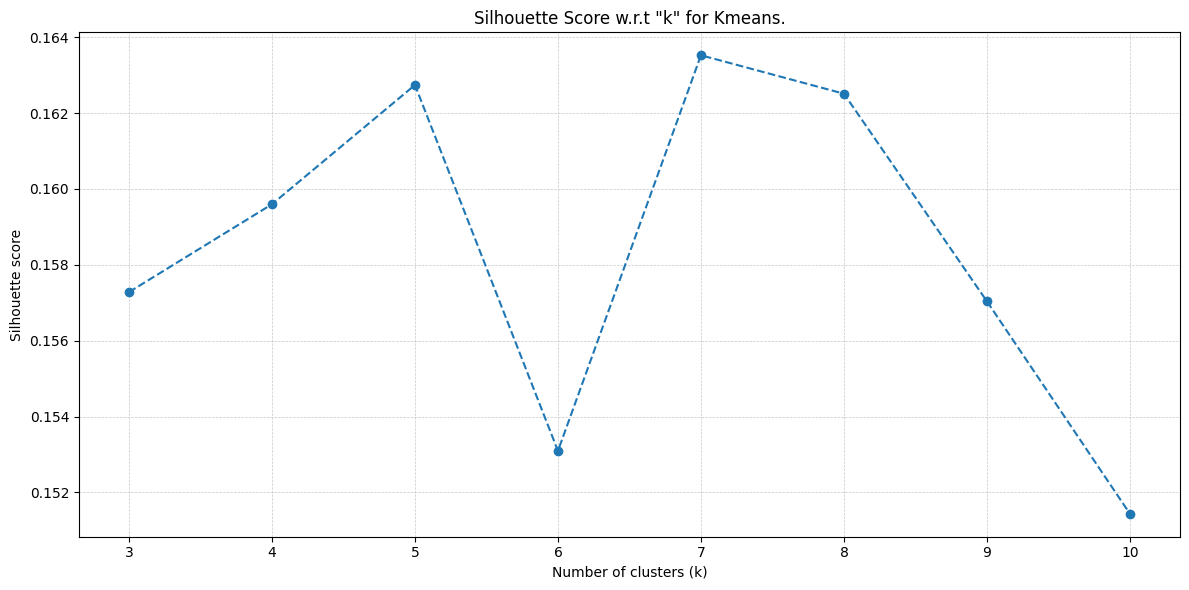


 The best number of clusters w.r.t silhouette score is: 7


In [33]:
# Retrieving best "k" index via silhouette scores.

# Computing KMeans with different k.
k_try = np.arange(3,11)
silh_scores = []
for kk in k_try:
    km_pp = KMeans(n_clusters=kk, random_state = random_seed)
    km_pp.fit(Y_pp)
    silh = silhouette_score(Y_pp,km_pp.labels_,random_state = random_seed)
    silh_scores.append(silh)
    
# Plotting.
plt.figure(figsize=(12,6))
plt.plot(k_try,silh_scores, linestyle='--', marker='o')
plt.title('Silhouette Score w.r.t \"k\" for Kmeans.')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.grid(True,linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Choosing the best "k" and fitting the dataset.
k =  k_try[np.argmax(silh_scores)]
print(f"\n The best number of clusters w.r.t silhouette score is: {k}")
km = KMeans(n_clusters=k, random_state = random_seed)
km.fit(Y_pp);

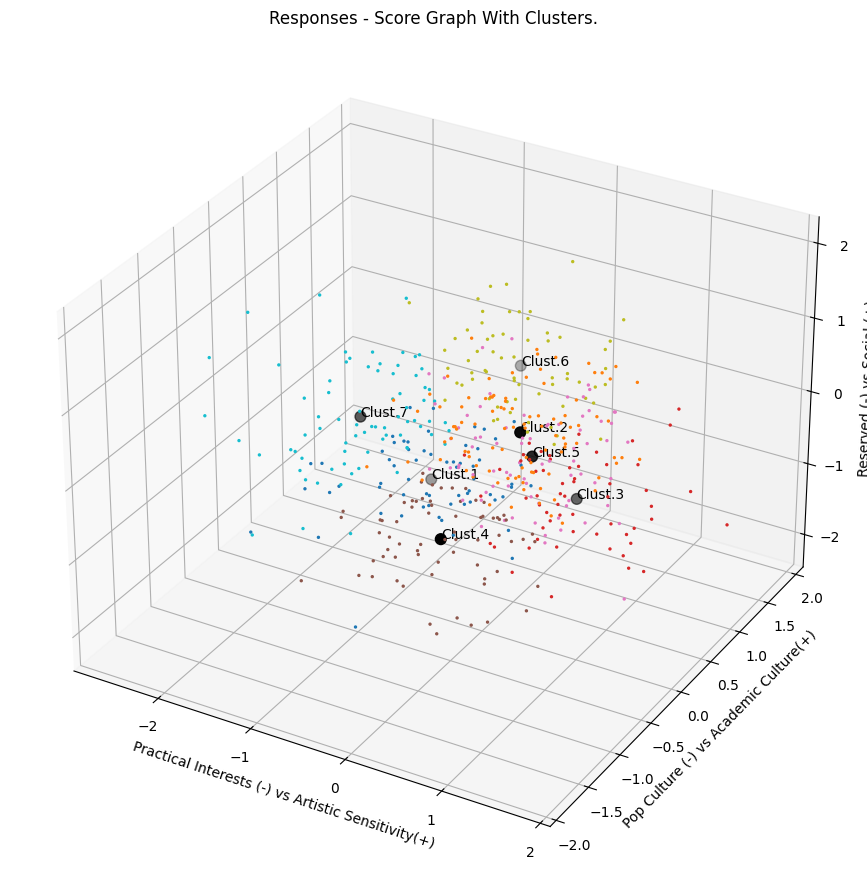

In [34]:
# Plotting.

# 3D score graph with centroids.
sg_3d_km = plt.figure(figsize=(9,9))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
ax_sg_3d_km.scatter(Y_pp[:,0], Y_pp[:,1], Y_pp[:,2],c=km.labels_,s=2,cmap='tab10',alpha=1)
ax_sg_3d_km.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c='black',s=60)
for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk,0],km.cluster_centers_[kk,1],km.cluster_centers_[kk,2],f'Clust.{kk+1}')
plt.title('Responses - Score Graph With Clusters.')
ax_sg_3d_km.set_xlabel(pc_names[0])   
ax_sg_3d_km.set_ylabel(pc_names[1])
ax_sg_3d_km.set_zlabel(pc_names[2])
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


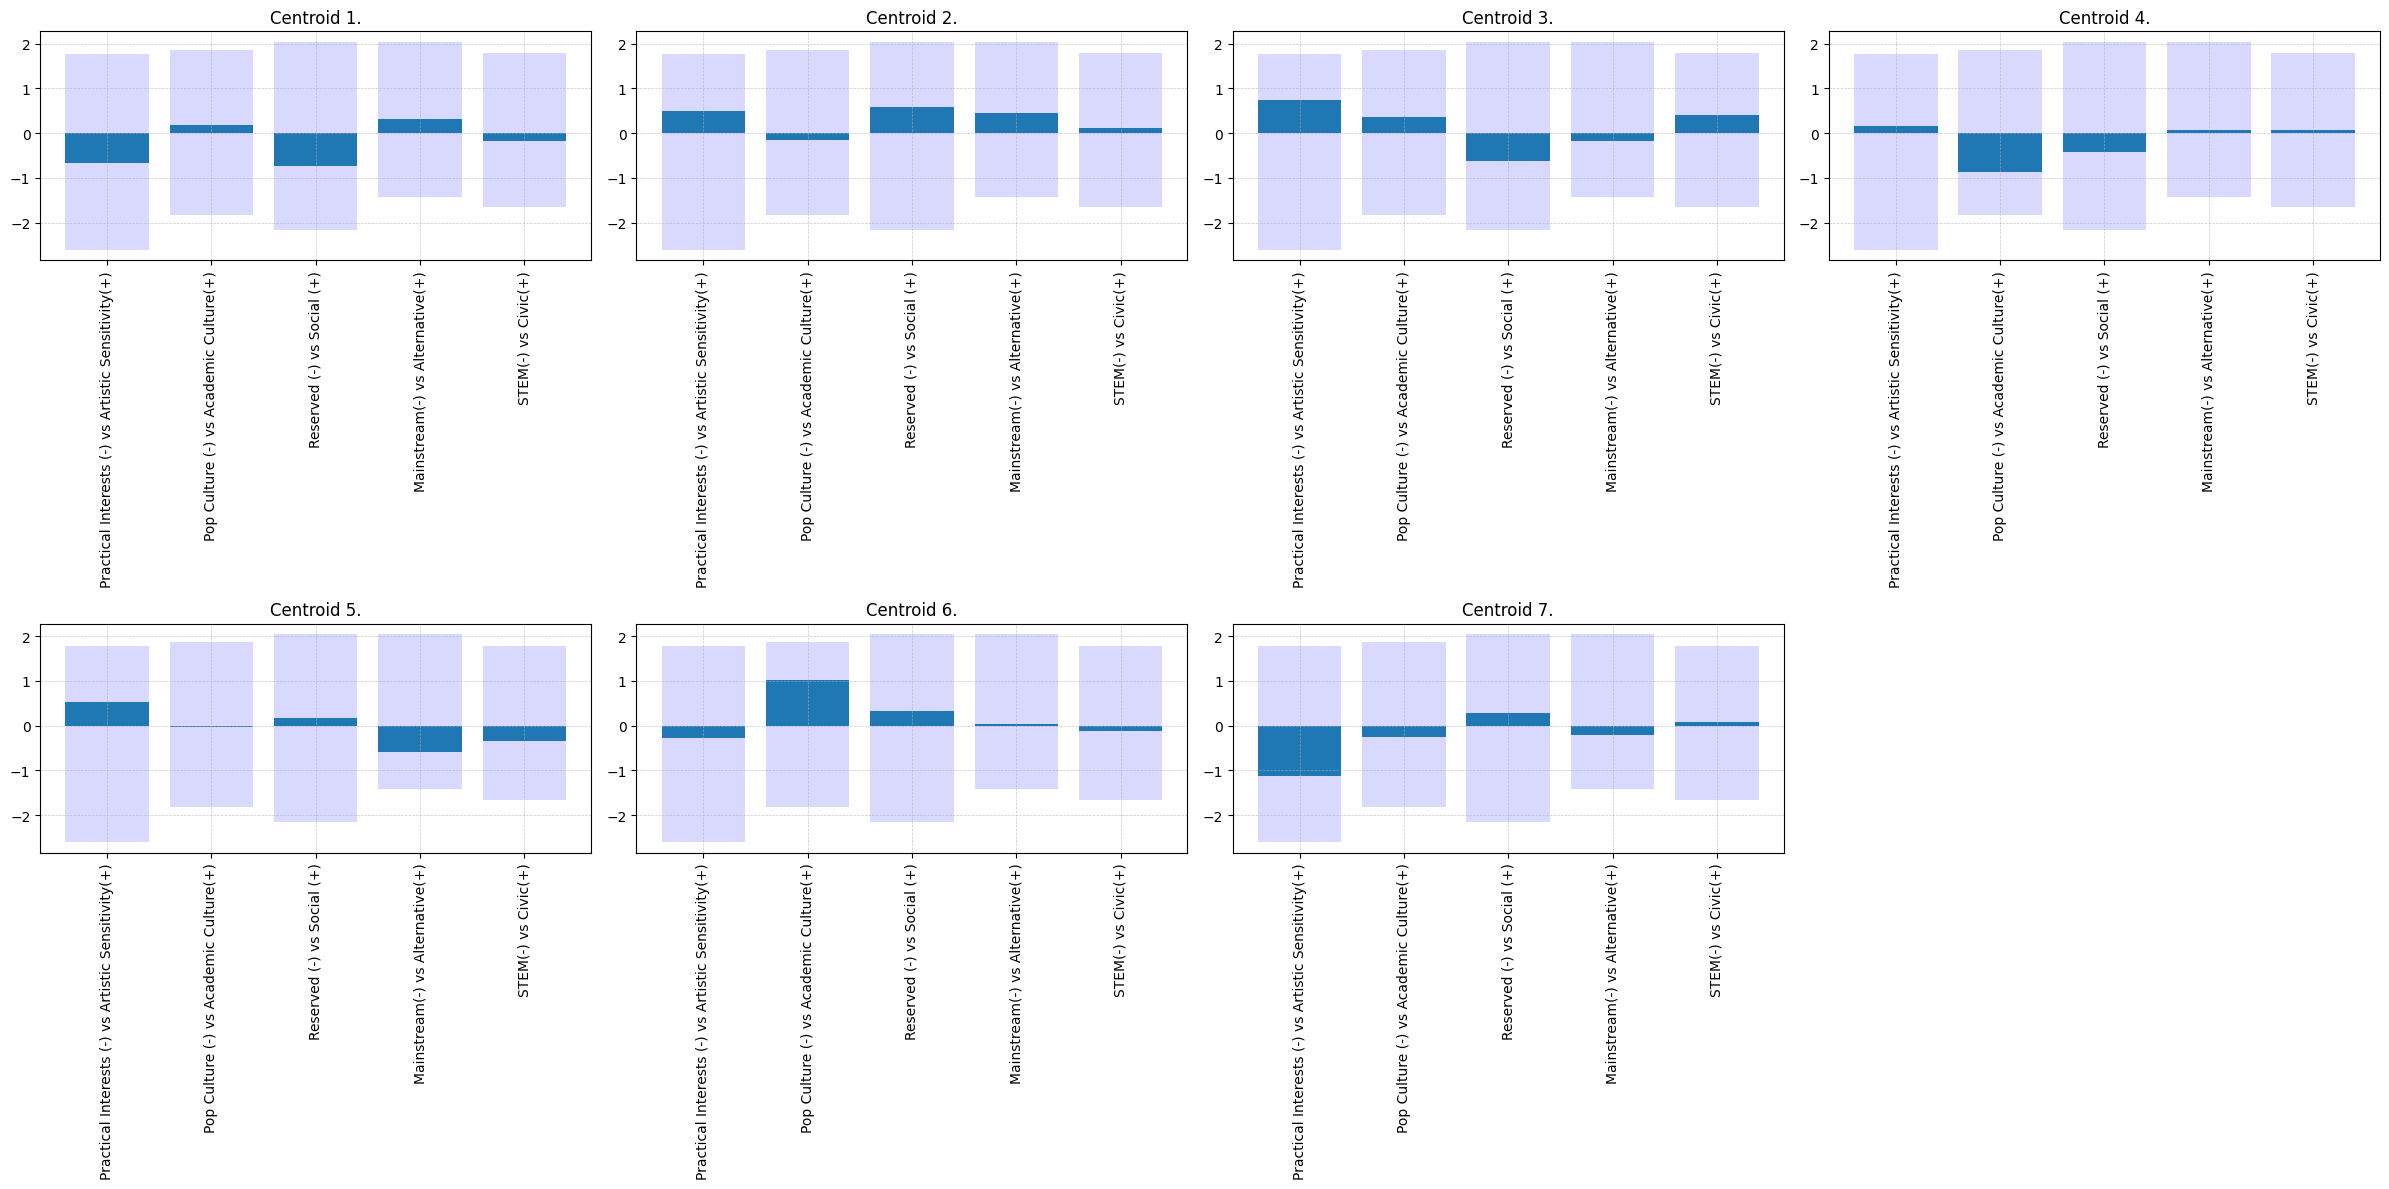

In [35]:
# Plotting histogram for each centroid and its components.

maxs_y = Y_pp.max(axis=0)
mins_y = Y_pp.min(axis=0)
fig, axes = plt.subplots(2, 4, figsize=(24, 12))  
axes = axes.flatten()
for i in range(k):
    ax = axes[i]
    ax.bar(np.arange(km.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax.bar(np.arange(km.cluster_centers_.shape[1]), km.cluster_centers_[i, :])
    ax.set_xticks(np.arange(km.cluster_centers_.shape[1]))
    ax.set_xticklabels(pc_names, rotation=90)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_title(f'Centroid {i+1}.')
# Hiding last plot since k == 7.
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Printing values.
# Commented out for visual reasons.

#for i in range(k):
#    values_try = km.cluster_centers_[i, :]
#    print(f"Centroid {i+1}: {values_try}")

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

**Centroid 1:** *Reserved Practical*

In this centroid we have a significant contribution for both Reserved people and people with Practical Interests. A good contribution it is also given by the Alternative axis of the fourth PC. The other contributions are negligible, so the chosen name is the most appropriate and refers to the personality of the people inside the cluster.

**Centroid 2:** *Social Creative*

Here the strongest components are related to Social and Artistic Sensitivity axes with a good contribute from the Alternative axis as well. The other PC values are small. So we can combine the Alternative lifestyle with the Artistic Sensitivity and define the Social Creative cluster.

**Centroid 3:** *Introspective Artists*

Here we have a significant contribution from the positive axis of the first PC, so this will be a cluster of artists. Looking at the other major contributions, we can state that the people in this cluster are rather reserved and have a civic lifestyle, so the attribute "Introspective" represents these qualities and matches with the artistic interests.

**Centroid 4:** *Pop Individualist*

This centroid is dominated by the Pop Culture and the Reserved axes, while the other contribution are negligible. So finding a name for this centroid is straight forward. We expect people that enjoy pop music and are also reserved to be in this cluster.

**Centroid 5:** *Mainstream Artists*

In this centroid the major contributions are given by the Mainstream and Artistic Sensitivity axes, respectively, with a smaller contribution from the STEM axis. Since all the other PCs are negligible, it is rather easy to choose a name for this cluster.

**Centroid 6:** *Academics*

Here we have a dominant contribution from the Academic Culture axis. The second gratest contribution is given from the Social axis. Since in the common imaginary people that are at a university interact with each other, we can safely say that this cluster will contain academic people.

**Centroid 7:** *Practical group*

This centroid has a great contribution for the Practical Interest axis. Other contributions are rather small, but the Social axis is the greatest among them. So we can suppose that this cluster represent a group of people that are part of a practical project and interact with each other.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

**Label 1:** *Age*

Since these clusters reflect the characteristics of people personality and/or lifestyle. It's interesting to see what is the distribution of the age of the people in each cluster. Considering also the fact that Centroid 6 should be a centroid of academics, we expect a precise age range for this cluster.

**Label 2:** *Gender*

For similar reasons, analyzing if a cluster contains more females or males can be useful to determine what preferences each gender has. We can analyze the results to evaluate the name of the clusters.

#### Write the code for the visualizations cited in item 2 above:

C:\Users\simod\AppData\Local\Temp\ipykernel_6240\4255826369.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('viridis')


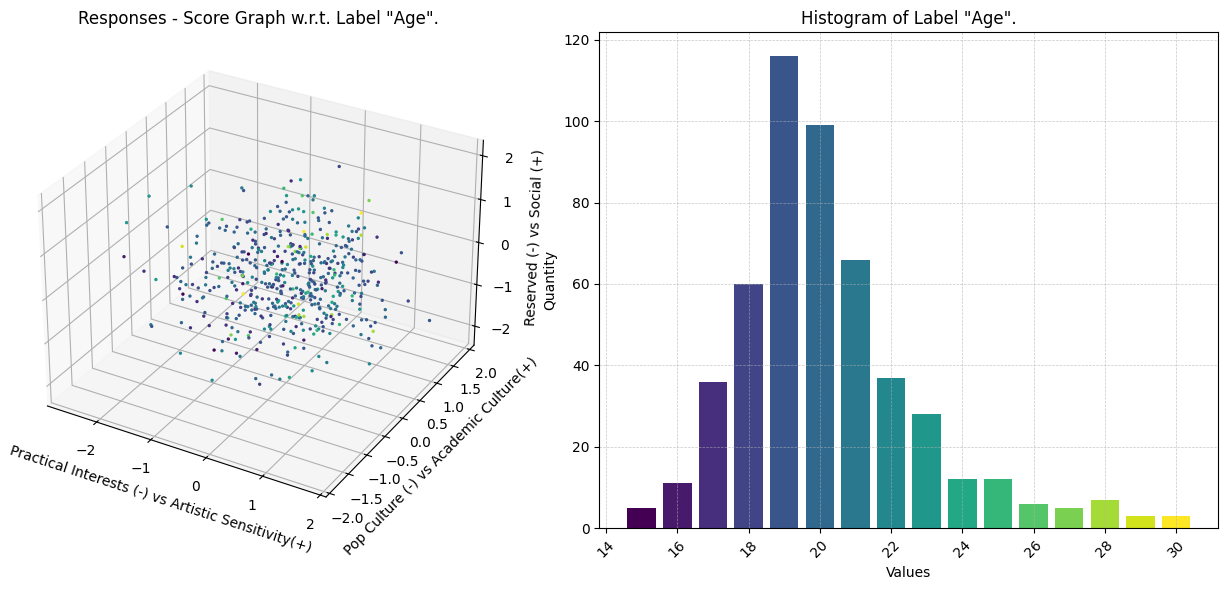

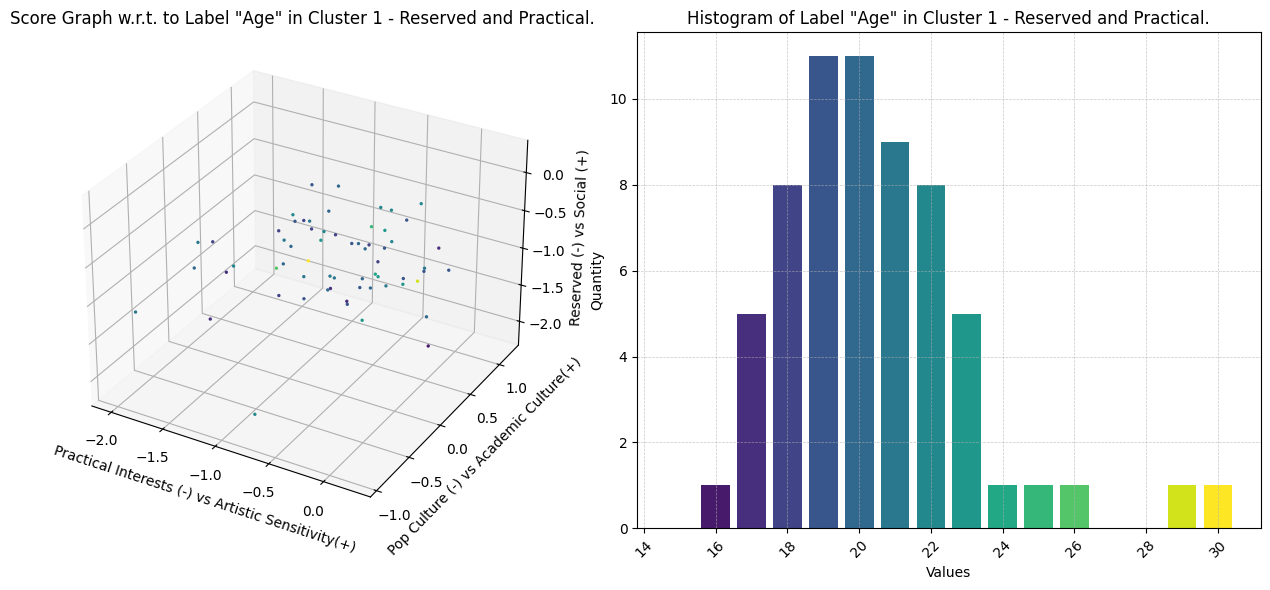

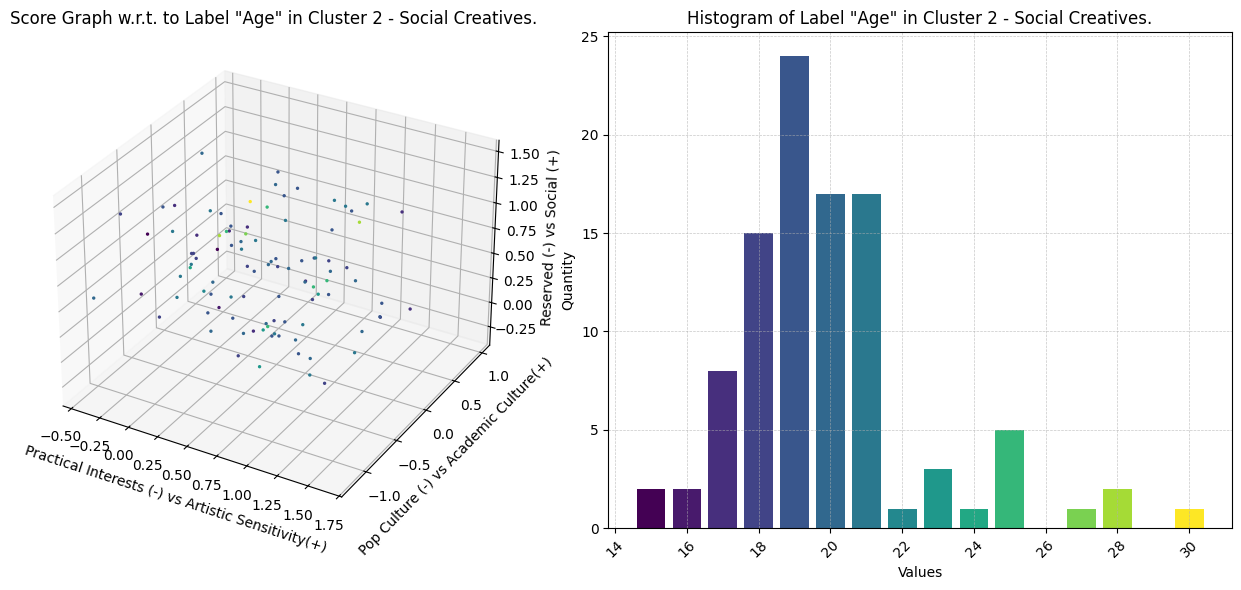

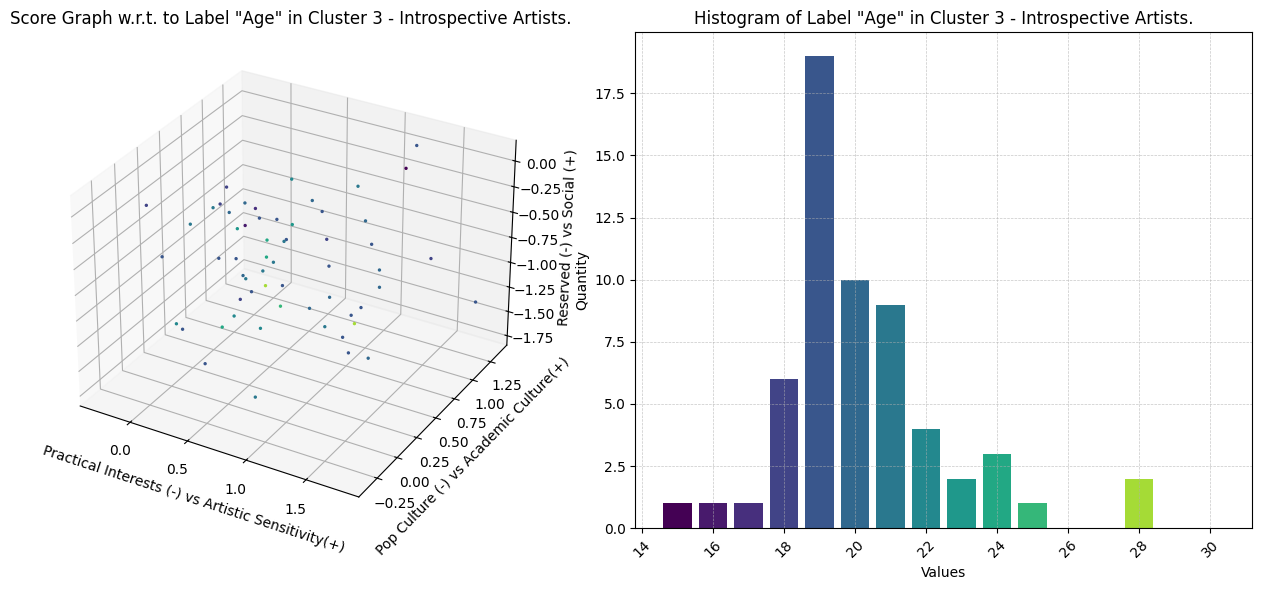

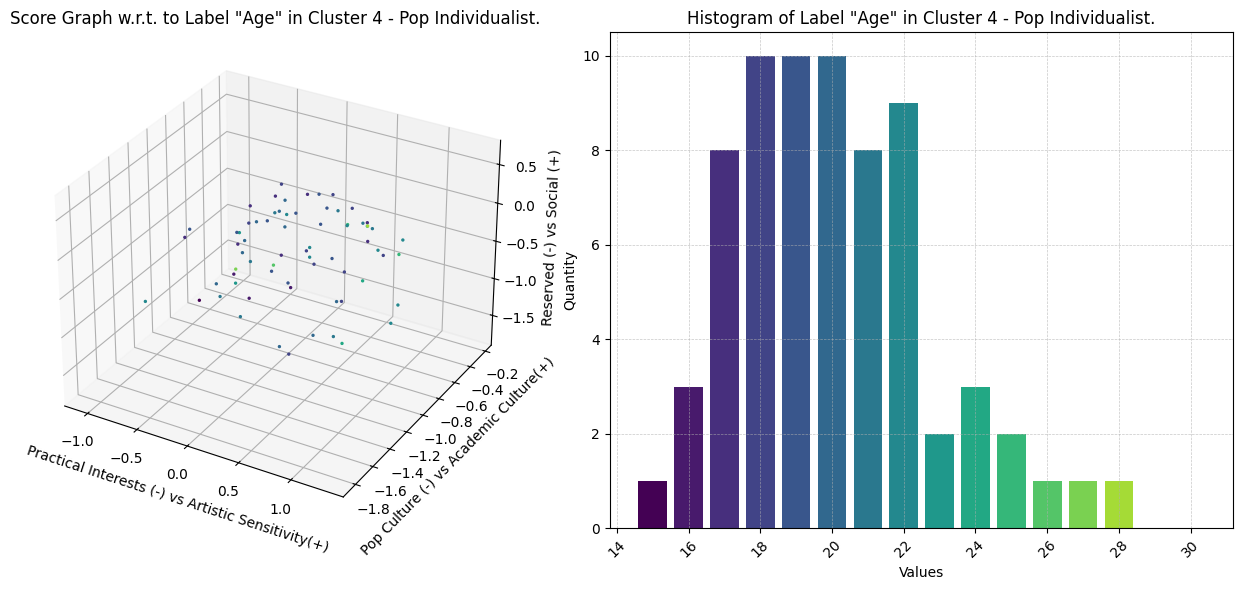

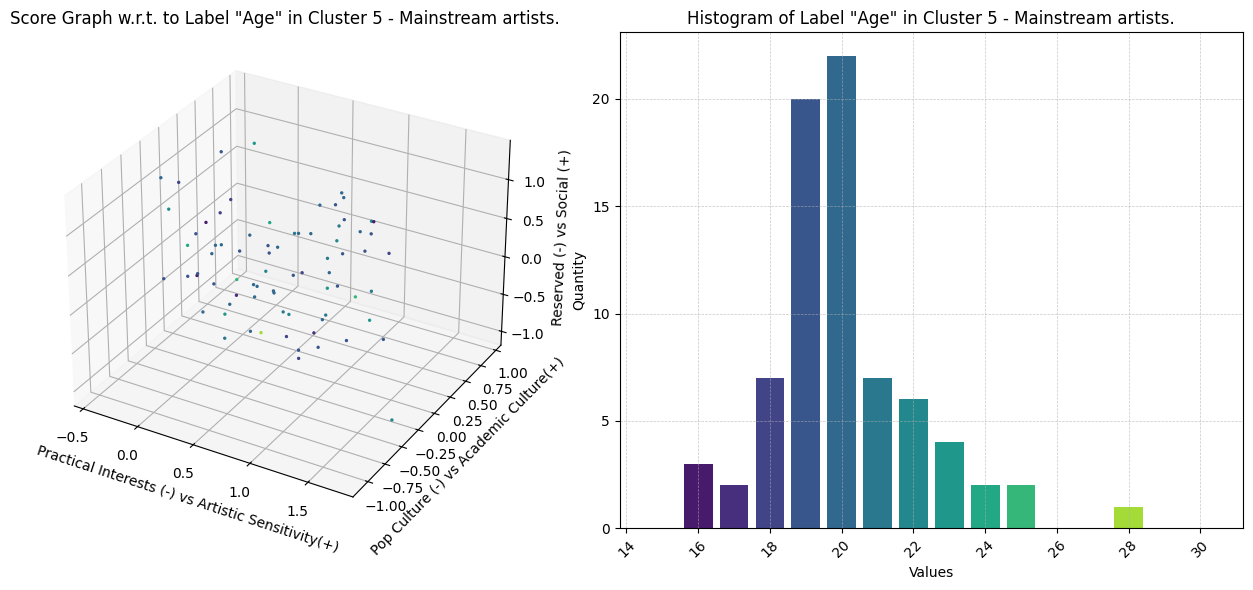

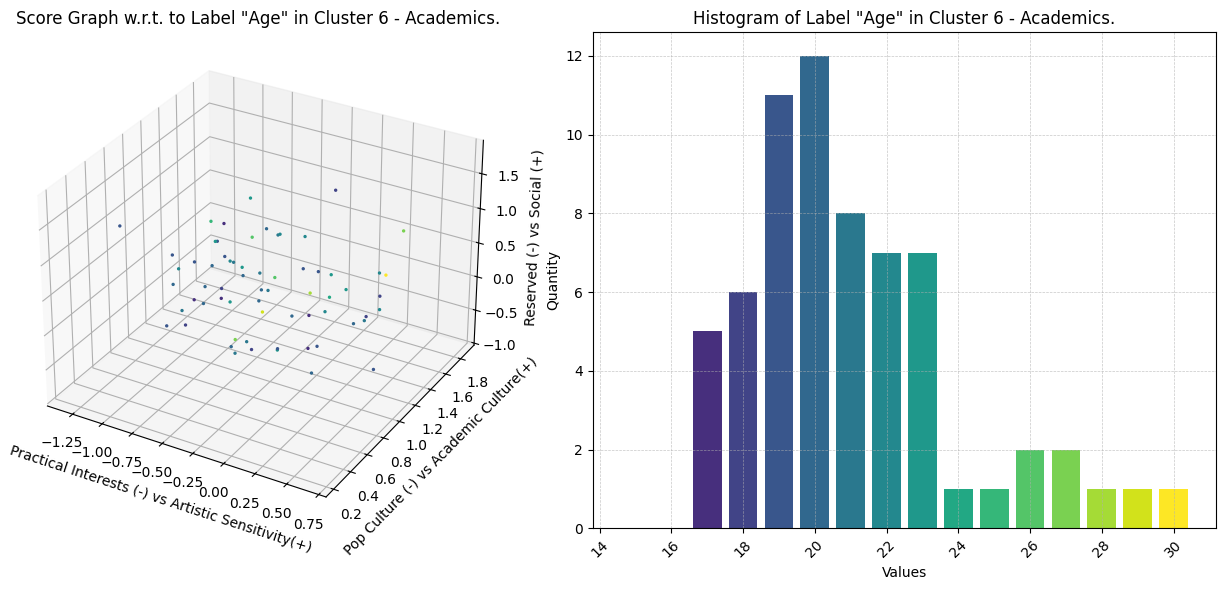

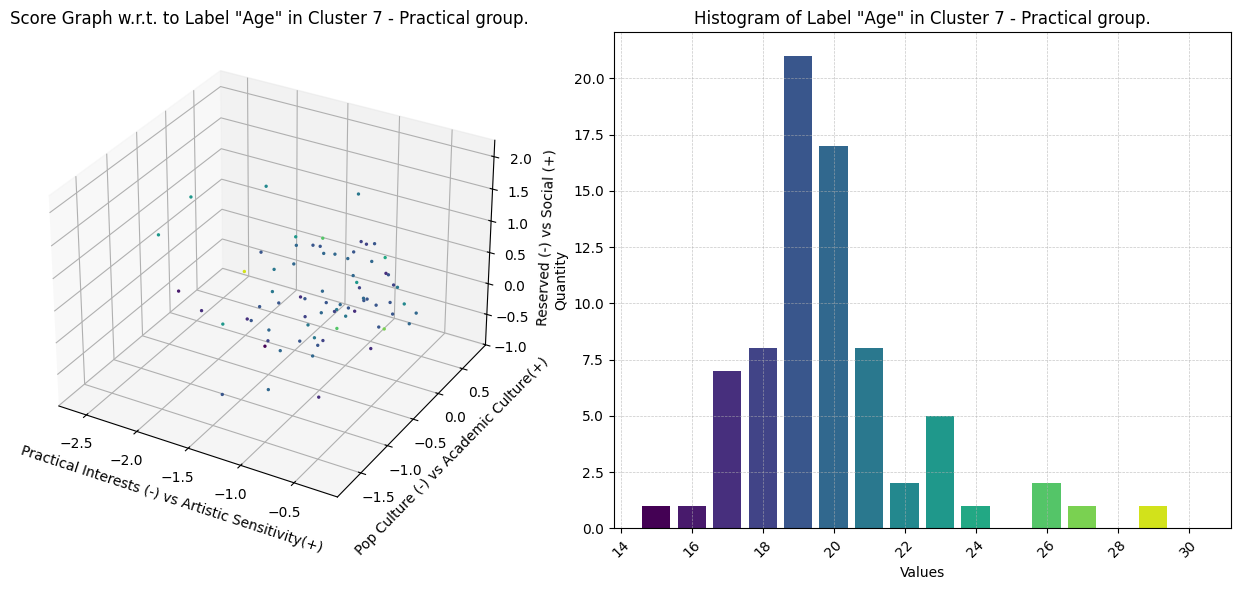

C:\Users\simod\AppData\Local\Temp\ipykernel_6240\4255826369.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('Pastel1')


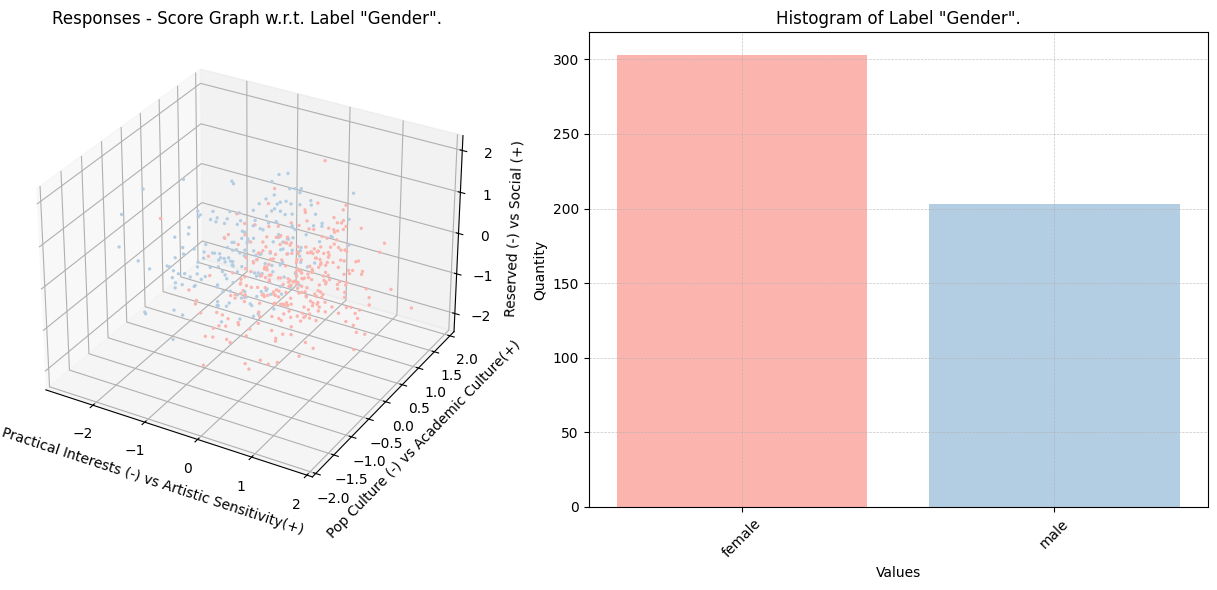

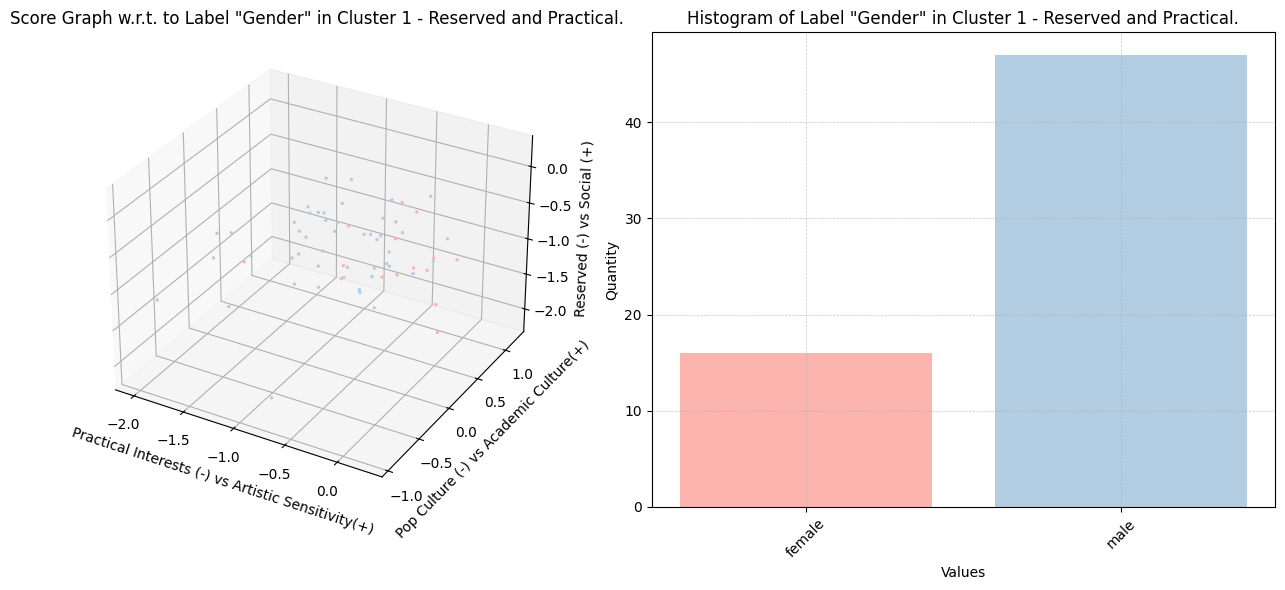

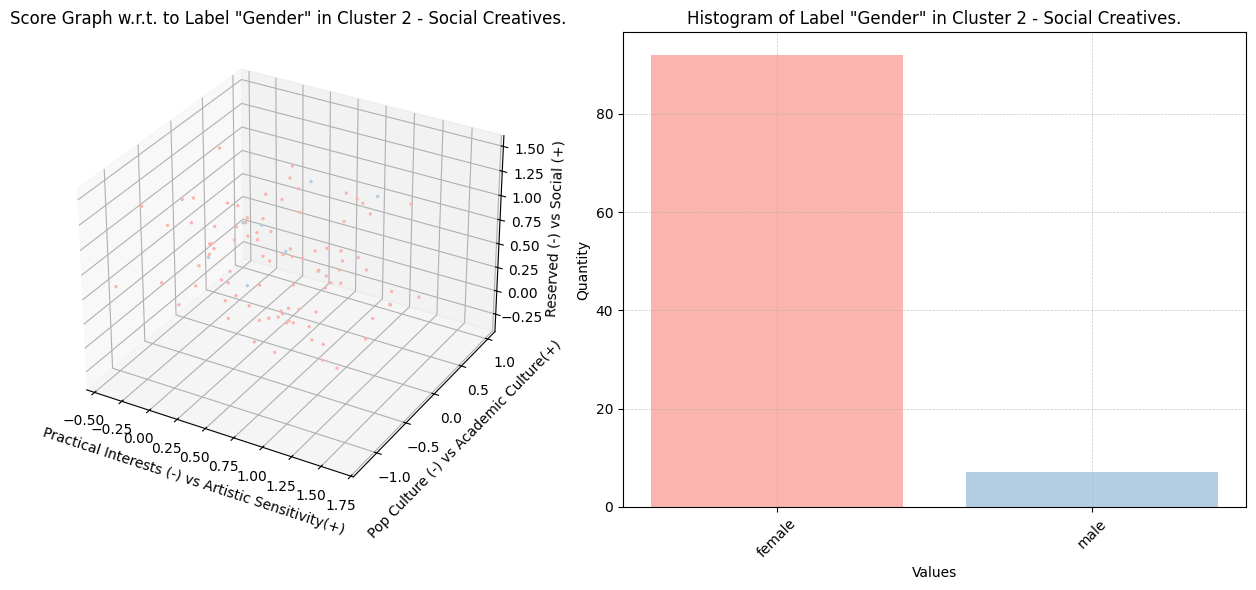

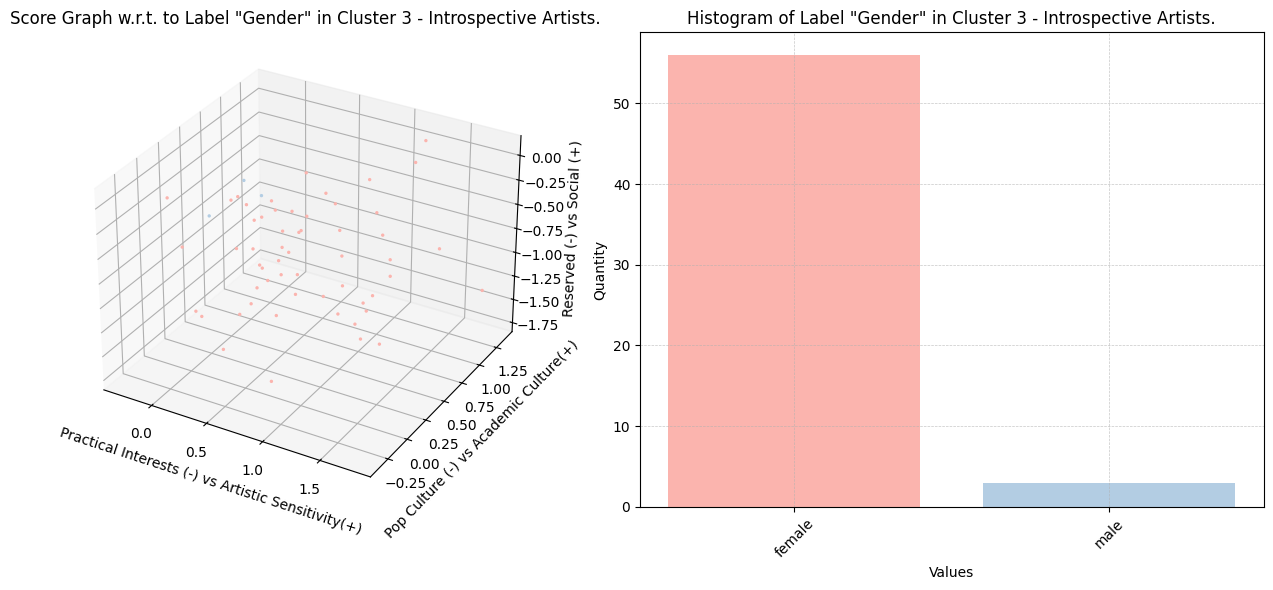

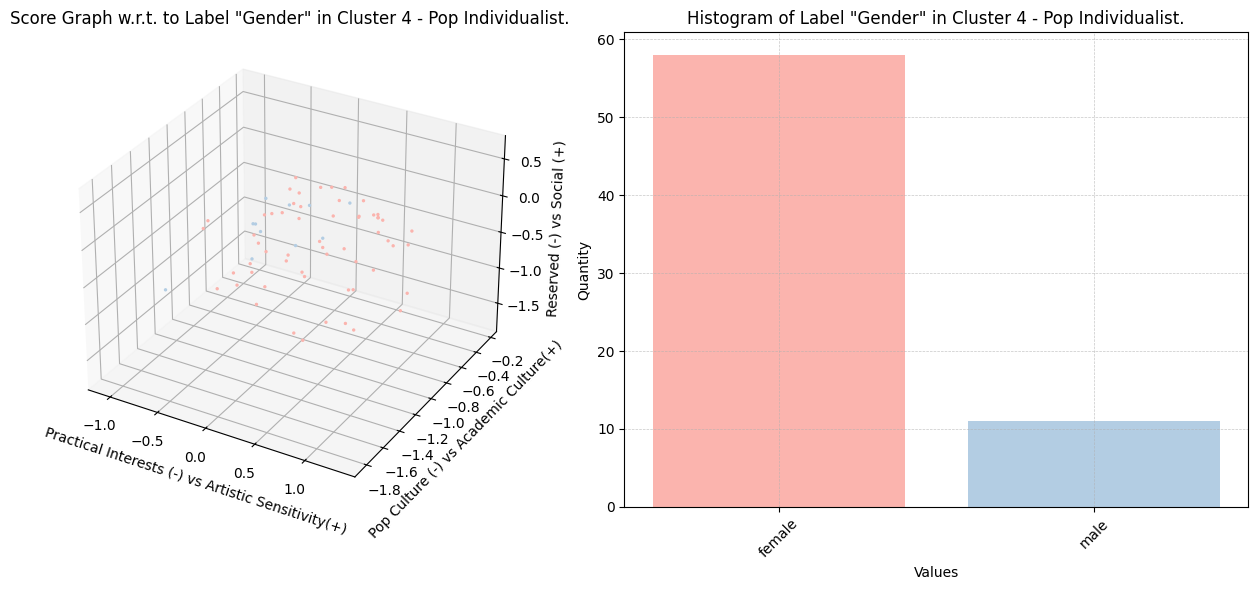

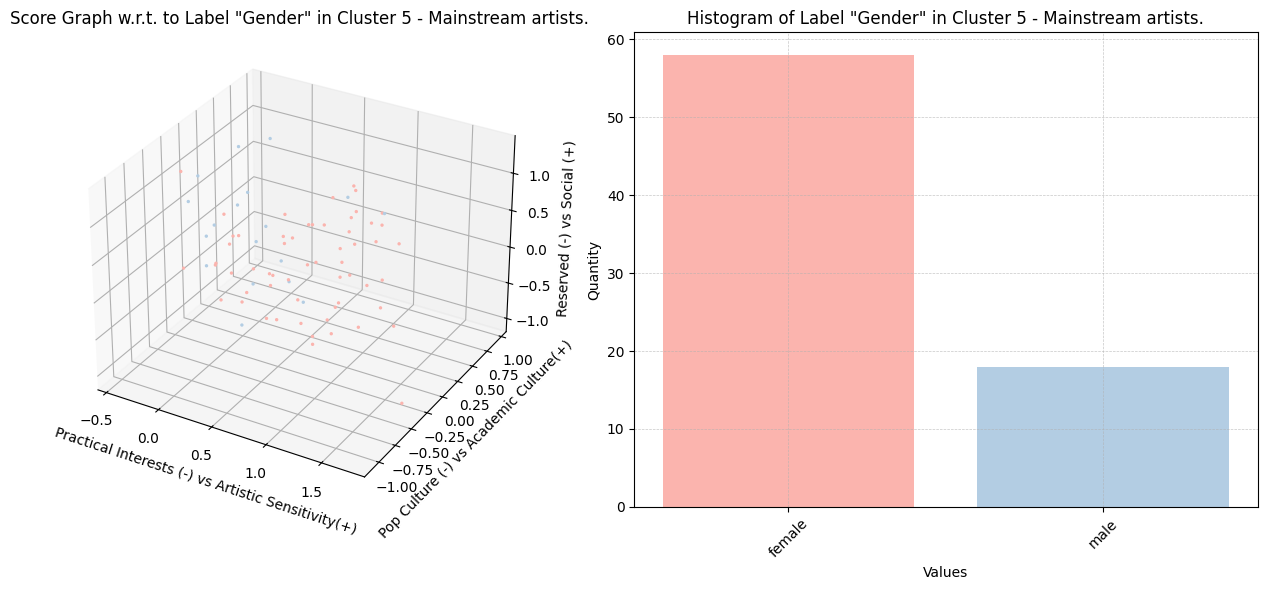

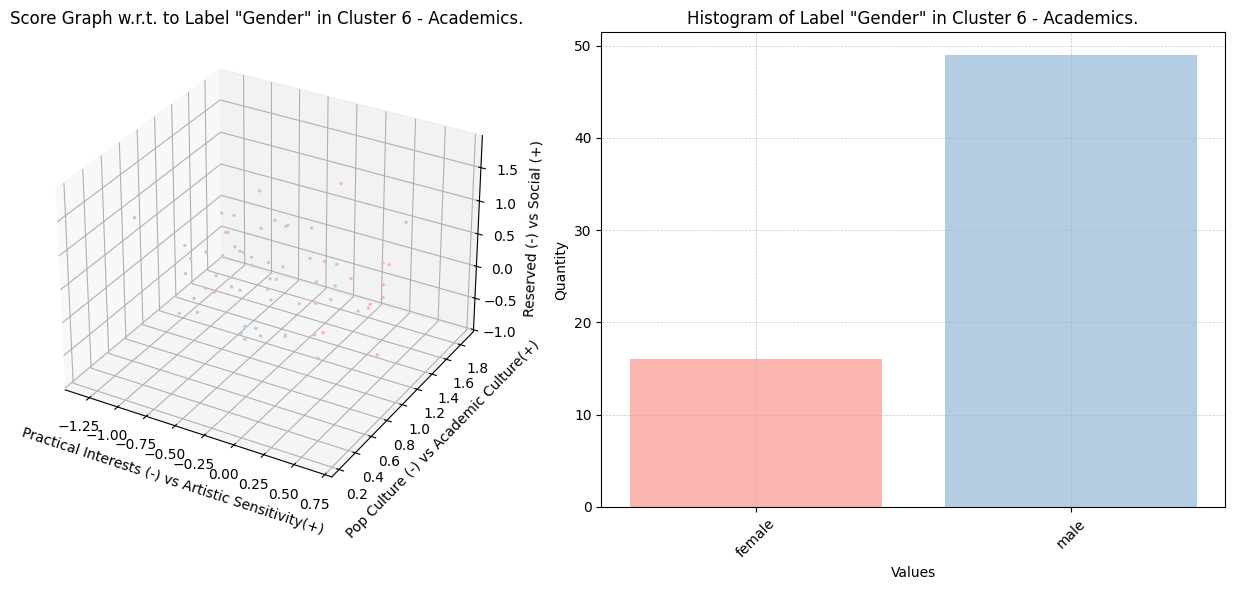

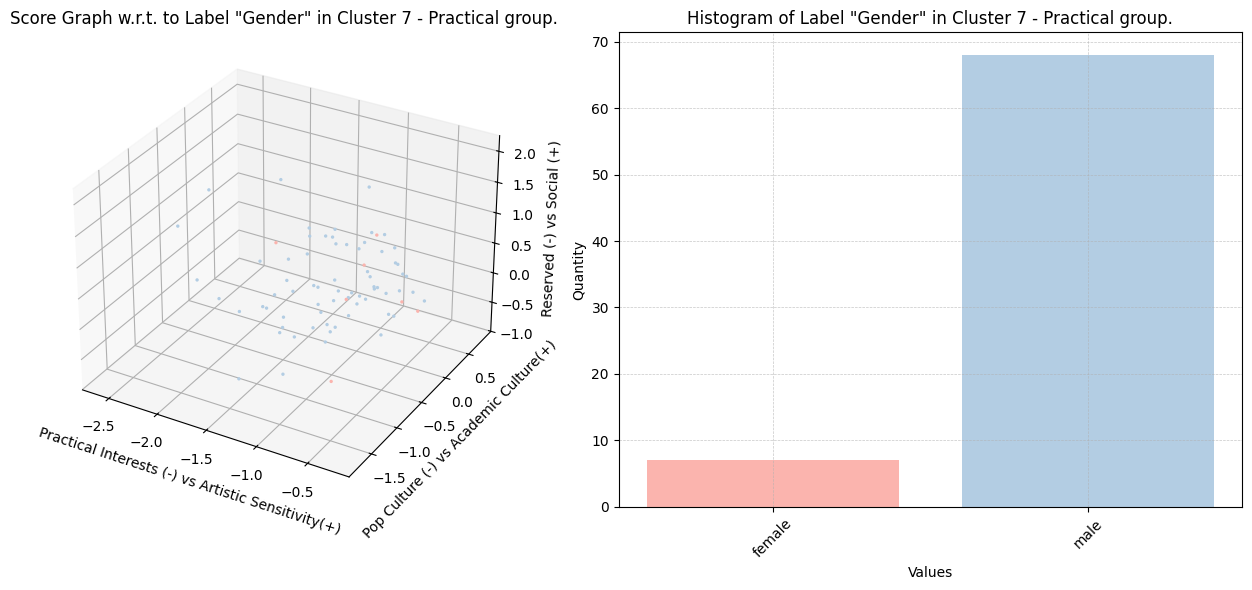

In [36]:
# Naming centroids and selecting labels.
centroids_names = ['Reserved and Practical',
                  'Social Creatives',
                  'Introspective Artists',
                  'Pop Individualist',
                  'Mainstream artists',
                  'Academics',
                  'Practical group'
                  ]
selected_labels = ['Age', 'Gender']

# Setting colors for each label.
for lb in selected_labels:
    lb_values, lb_counts = np.unique(responses_lb[lb].values,return_counts = True)
    if lb == 'Age':
        n_colors_hist = responses_lb[lb].max()-responses_lb[lb].min() +1
        cmap_hist = cm.get_cmap('viridis')
        color_hist = cmap_hist(np.linspace(0,1,n_colors_hist))
        color_scat = [color_hist[l-responses_lb[lb].min(),:3] for l in responses_lb[lb].values]
    else:
        n_colors_hist = lb_values.size
        cmap_hist = cm.get_cmap('Pastel1')
        color_scat_dict = {lb_values[i]: i for i in range(len(lb_values))}
        color_scat = [cmap_hist(color_scat_dict[l]) for l in responses_lb[lb].values]
        color_hist = cmap_hist(np.arange(0,n_colors_hist))

    color_hist = color_hist[:,:3]
    
    # Plotting overall information.
    
    #  Overall score graph.
    fig_lb = plt.figure(figsize=(13,6))
    axl_lb = fig_lb.add_subplot(1,2,1,projection='3d')
    scat_lb = axl_lb.scatter(Y_pp[:,0],Y_pp[:,1],Y_pp[:,2], s=2,c=color_scat,alpha=1)
    axl_lb.set_title(f'Responses - Score Graph w.r.t. Label \"{lb}\".')
    axl_lb.set_xlabel(pc_names[0])
    axl_lb.set_ylabel(pc_names[1])
    axl_lb.set_zlabel(pc_names[2])
    axl_lb.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()

    # Overall histogram.
    ax2_lb = fig_lb.add_subplot(1,2,2)
    ax2_lb.bar(lb_values,lb_counts,color=color_hist) 
    ax2_lb.tick_params(axis='x', labelrotation=45)
    ax2_lb.set_title(f'Histogram of Label \"{lb}\".')
    ax2_lb.set_xlabel('Values')
    ax2_lb.set_ylabel('Quantity')
    ax2_lb.grid(True, linestyle='--',linewidth=0.5, alpha =0.7)
    plt.tight_layout()
    plt.show()

    # Plotting individual information.
    
    for cc in range(km.cluster_centers_.shape[0]):
        # Individual score graph.
        where_cc = np.argwhere(km.labels_ ==cc).flatten()
        cc_values_, cc_counts_ = np.unique(responses_lb[lb].values[where_cc],return_counts = True)
        new_counts = np.zeros_like(lb_values,dtype=int)
        for val,count in zip(cc_values_, cc_counts_):
            idx = np.where(lb_values==val)[0]
            new_counts[idx] = count  
        cc_values_ = lb_values
        cc_counts_ = new_counts
        fig_cc = plt.figure(figsize=(13,6))
        axl_cc = fig_cc.add_subplot(1,2,1,projection='3d')
        scat_cc = axl_cc.scatter(Y_pp[where_cc,0],Y_pp[where_cc,1],Y_pp[where_cc,2], s=2,c= [color_scat[wcc] for wcc in where_cc],alpha=1)
        axl_cc.set_title(f"Score Graph w.r.t. to Label \"{lb}\" in Cluster {cc+1} - {centroids_names[cc]}.")
        axl_cc.set_xlabel(pc_names[0])
        axl_cc.set_ylabel(pc_names[1])
        axl_cc.set_zlabel(pc_names[2])
        axl_cc.grid(True,linestyle='--',linewidth=0.5,alpha=0.7)
        plt.tight_layout()

        # Individual histogram.
        ax2_cc = fig_cc.add_subplot(1,2,2)
        ax2_cc.bar(lb_values,cc_counts_, color=color_hist)
        ax2_cc.tick_params(axis='x', labelrotation=45)
        ax2_cc.set_title(f"Histogram of Label \"{lb}\" in Cluster {cc+1} - {centroids_names[cc]}.")
        ax2_cc.set_xlabel("Values")
        ax2_cc.set_ylabel("Quantity")
        ax2_cc.grid(True, linestyle='--', linewidth=0.5, alpha =0.7)
        plt.tight_layout()
        plt.show()

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

**Age:**

Overall we can see that there are a lot of people of age 17-23. In cluster 2, 3, 5, and 7 we have a peak on age 19 and/or 20. In the other clusters age is more equally distributed but always focused on the main range. For cluster 6 we can see that most people are 19 from 23 years old, there are no people below the age of 17 and there are much more people above the age of 23 compared to the other clusters. This almost perfectly matches the name of the cluster.

**Gender:** 

Overall there are approximately a hundred more female than male. In cluster from 2 to 5, we have a majority of females. That is suitable for the name of the clusters that we have chosen. For the clusters that regards the practical interests and the academics, there is a majority of men. That is also suitable for the name of the clusters. Probably most of the people who are interested in practical things who were interviewed came from a STEM university, where usually there are more males than females.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Silhouette scores for each cluster and global silhouette score:


Sil. score
Reserved and Practical    0.164741
Social Creatives          0.172375
Introspective Artists     0.160123
Pop Individualist         0.163134
Mainstream artists        0.147964
Academics                 0.170023
Practical group           0.163973
Global                    0.163522

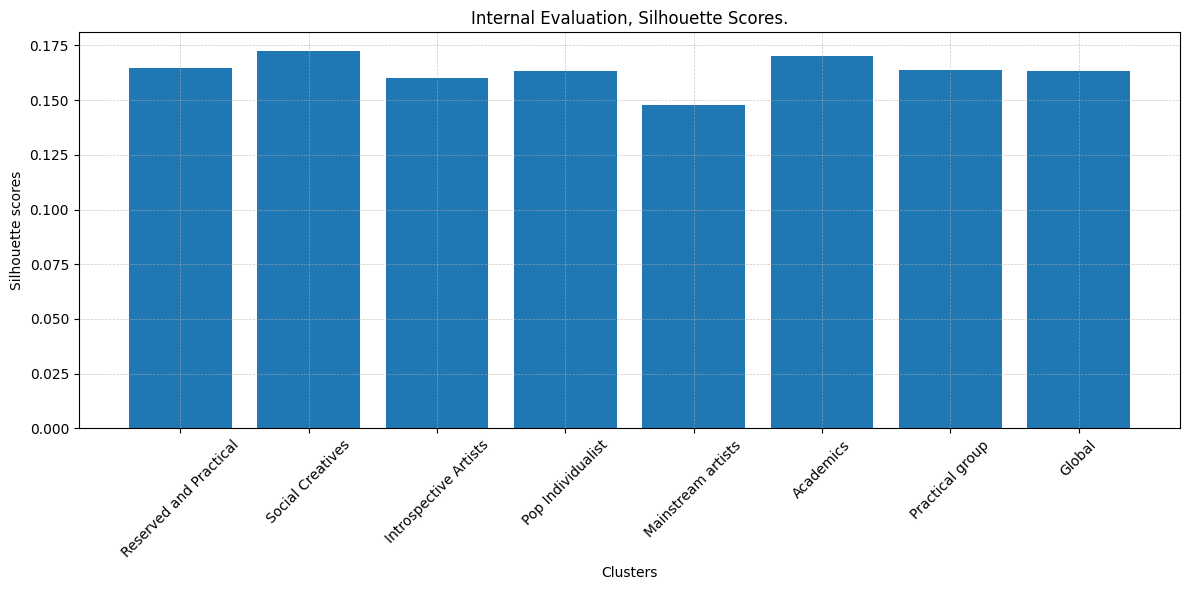

In [37]:
# Computing silhouette scores for whole dataset and for each cluster.
silcoeff = silhouette_score(Y_pp,km.labels_,random_state = random_seed)
silscores = silhouette_samples(Y_pp, km.labels_) # Cluster by cluster.
cluster_silscores = [np.mean(silscores[km.labels_==kk]) for kk in range(k)]
silcoeffs_df = pd.DataFrame(np.array(cluster_silscores + [silcoeff]), index = centroids_names + ['Global'], columns =['Sil. score'])
# Printing silhouette scores.
print("Silhouette scores for each cluster and global silhouette score:")
display(silcoeffs_df)

# Barplot of silhouette scores.
plt.figure(figsize=(12,6))
plt.bar(silcoeffs_df.index.tolist(),silcoeffs_df['Sil. score'].values)
plt.xticks(rotation=45) 
plt.xlabel('Clusters')
plt.ylabel('Silhouette scores')
plt.title('Internal Evaluation, Silhouette Scores.')
plt.grid(True, linestyle='--',linewidth=0.5,alpha=0.7)
plt.tight_layout()

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):
These silhouette scores belongs to range $[0.148, 0.172]$, which is not necessarily bad, considering that the worst silhouette score is $-1$. Though, this could be certainly better. Highest scores are the one for the Social Creative and Academics clusters; the worst one is associated to the Mainstream Artists cluster. Global silhouette score correspond approximately to the average of all scores. In fact, we have seen that the clusterization procedure was not perfect (especially for the Age label). We have also seen that the score graph does not present some obvious clusterization and all data are relatively close to each other. Though, we managed to get satisfactory results for the Gender label and the subdivision in clusters is overall good, especially the one for the Academics cluster. We must also notice that we worked with a relatively low explained variance ($33\%$), so we couldn't expect perfect results.